<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "3" #@param {type:"string"}
"""Student_ID&Name = "a" #@param {type:"string"}
Student_ID&Name = "b" #@param {type:"string"}
Student_ID&Name = "c" #@param {type:"string"}
Student_ID&Name = "d" #@param {type:"string"}
Student_ID&Name = "e" #@param {type:"string"}"""
#@markdown ---

'Student_ID&Name = "a" #@param {type:"string"}\nStudent_ID&Name = "b" #@param {type:"string"}\nStudent_ID&Name = "c" #@param {type:"string"}\nStudent_ID&Name = "d" #@param {type:"string"}\nStudent_ID&Name = "e" #@param {type:"string"}'

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Draft" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# to generate word clouds
from wordcloud import WordCloud

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, silhouette_score, mean_absolute_error
from sklearn import linear_model

# To reduce dimensionality of the word-embeddings
from sklearn.decomposition import TruncatedSVD, PCA

# to perform clustering
from sklearn import cluster

# To aid in determining feature importance
from xgboost import XGBClassifier
from xgboost import plot_importance

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# To use GloVe model
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [9]:
# General work
import os

np.random.seed(123)

In [10]:
!pip install gpy

In [11]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [12]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Exploratory Data Analysis

### Train dataset

In [13]:
housePath = ''
is_COLAB = 'google.colab' in str(get_ipython())
if is_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    housePath = '/content/drive/MyDrive/Colab Notebooks/Data/house/'
else:
    housePath = './data/'

In [14]:
# file names
train_file_name = 'HousePrice_Train.csv'
test_file_name = 'HousePrice_Test.csv'

# training dataset: 
training_file = housePath + train_file_name

# test dataset: 
testing_file = housePath + test_file_name

In [15]:
# load train dataset
df_train = pd.read_csv(training_file)
df_train.head()

Index        ID      Location  Num_Bathrooms  Num_Beds BER_class  \
0      1  12409116         Ongar              2         2        C3   
1      2  12320330  North Strand              1         2        D1   
2      3  12405953     Stepaside              3         3        A3   
3      4  12202582    Cabinteely              1         3        E1   
4      5  12299336          Lusk              3         4        D1   

                                         Description Services  \
0  DNG are delighted to present to the market no....      NaN   
1  13 Northbrook Terrace is a charming red brick ...      NaN   
2  Welcome to No. 6 Cotter Close, an immaculately...      NaN   
3  Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...      NaN   
4  'Four Seasons' comes to the market as a wonder...      NaN   

                                            Features   Latitude  Longitude  \
0                                               None  53.396659  -6.438791   
1  Bight and Spacious interior\nNumerous original...  53.357129  -6.239779   
2  Special Features\nLarge rear garden\nGenerous ...  53.266468  -6.222771   
3  Wonderful 3 bed detached bungalow.     \nAccom...  53.261600  -6.166738   
4  Detached Property      \nDouble Glazed Windows...  53.550731  -6.121415   

            Type  Surface   Price  
0      apartment    67.00  195000  
1       terraced    95.97  425000  
2  semi-detached   107.00  535000  
3       detached    81.00  499000  
4       detached   153.00  510000

In [16]:
# show first data frame rows 
df_train.head()

Index        ID      Location  Num_Bathrooms  Num_Beds BER_class  \
0      1  12409116         Ongar              2         2        C3   
1      2  12320330  North Strand              1         2        D1   
2      3  12405953     Stepaside              3         3        A3   
3      4  12202582    Cabinteely              1         3        E1   
4      5  12299336          Lusk              3         4        D1   

                                         Description Services  \
0  DNG are delighted to present to the market no....      NaN   
1  13 Northbrook Terrace is a charming red brick ...      NaN   
2  Welcome to No. 6 Cotter Close, an immaculately...      NaN   
3  Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...      NaN   
4  'Four Seasons' comes to the market as a wonder...      NaN   

                                            Features   Latitude  Longitude  \
0                                               None  53.396659  -6.438791   
1  Bight and Spacious interior\nNumerous original...  53.357129  -6.239779   
2  Special Features\nLarge rear garden\nGenerous ...  53.266468  -6.222771   
3  Wonderful 3 bed detached bungalow.     \nAccom...  53.261600  -6.166738   
4  Detached Property      \nDouble Glazed Windows...  53.550731  -6.121415   

            Type  Surface   Price  
0      apartment    67.00  195000  
1       terraced    95.97  425000  
2  semi-detached   107.00  535000  
3       detached    81.00  499000  
4       detached   153.00  510000

In [17]:
# Generate descriptive statistics
df_train.describe()

Index            ID  Num_Bathrooms     Num_Beds     Latitude  \
count  1638.000000  1.638000e+03    1638.000000  1638.000000  1638.000000   
mean    819.500000  1.231930e+07       2.054335     3.043346    53.350473   
std     472.994186  1.447540e+05       1.241259     1.379650     0.076832   
min       1.000000  1.118567e+07       1.000000     1.000000    52.501856   
25%     410.250000  1.228104e+07       1.000000     2.000000    53.294261   
50%     819.500000  1.238055e+07       2.000000     3.000000    53.341386   
75%    1228.750000  1.240548e+07       3.000000     4.000000    53.382031   
max    1638.000000  1.242836e+07      18.000000    27.000000    53.630588   

         Longitude       Surface         Price  
count  1638.000000   1638.000000  1.638000e+03  
mean     -6.255086    169.540695  5.547196e+05  
std       0.144430   1791.793934  5.652032e+05  
min      -6.497000      3.400000  1.999500e+04  
25%      -6.309613     73.000000  2.950000e+05  
50%      -6.247780     97.050000  3.950000e+05  
75%      -6.193982    135.000000  5.950000e+05  
max      -1.744995  72236.387140  8.900000e+06

Reviewing the training dataset we can immediately see points of note which require inspection:  
- The maximum longitude of -1.7 degrees is outside of Ireland.
- The maximum number of beds and bathrooms, 27 and 18, are not likely to belong to houses.  
- The maximum surface area is over 400 times the size of the mean.

We remove the **id** and **index** columns before performing further inspection.

In [18]:
df_train.drop(['ID', 'Index'], axis=1, inplace=True)

We view categorical variables.

In [19]:
# Gathering categorical variables although not a guaranteed manner to do it given variables could be numerically encoded. 
numeric_attr = df_train._get_numeric_data().columns
all_attr = df_train.columns
categ_var = list(set(all_attr) - set(numeric_attr))
print(f"Categorical variables: {categ_var}")

Categorical variables: ['Features', 'Type', 'Services', 'Location', 'Description', 'BER_class']


In [20]:
# View detail of the categorical attributes without the text blocks Description and Features
categ_var.remove('Description')
categ_var.remove('Features')

In [21]:
for cat_var in categ_var:
    print(f"-- Attribute: {cat_var}:\n{df_train[cat_var].value_counts()}\n")

-- Attribute: Type:
semi-detached     458
apartment         431
terraced          299
detached          234
end-of-terrace    118
bungalow           48
duplex             33
townhouse          14
studio              2
site                1
Name: Type, dtype: int64

-- Attribute: Services:
Parking,Gas Fired Central Heating                                                               118
Parking                                                                                          77
Parking,Gas Fired Central Heating,Wired for Cable Television                                     74
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television                               62
Parking,Gas Fired Central Heating,Alarm                                                          57
Parking,Wired for Cable Television                                                               35
Gas Fired Central Heating                                                                        25
Parking,Oi

We look for missing data

In [22]:
# Check for number of missing values in original data prior to any transform
df_train.isna().sum()

Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [23]:
# Show percentage of missing values
df_train.isna().sum() * 100 / len(df_train)

Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64

As **Services** is missing 64% of entries it is unlikely to be reliable in telling us much for our dataset. We will remove it. **BER_class** is missing 15% which we will replace with the mode.

In [24]:
df_train.drop(['Services'], axis=1, inplace=True)

BER_mode = df_train.BER_class.mode()[0]
df_train.BER_class.replace(0, BER_mode, inplace=True)

We look at boxplots for outliers:

In [25]:
def plot_multiple_boxplots(dataframe: pd.DataFrame=None, feature_list: list=None) -> None:
    """Plot multiple boxplots for features in a list
    
    Args:
        dataframe: DataFrame from which to pull features provided in feature_list
        feature_list: list, contains string names of features to plot
    Returns:
        None
    """
    fig, axes = plt.subplots(1, len(feature_list))
    for i, col in enumerate(feature_list):
        ax = sns.boxplot(y=dataframe[col], ax=axes.flatten()[i])
        ax.set_ylim(dataframe[col].min(), dataframe[col].max())
        ax.set_ylabel(col)
    fig.set_size_inches(16, 4)
    plt.show()

Numeric variables: Index(['Num_Bathrooms', 'Num_Beds', 'Latitude', 'Longitude', 'Surface',
       'Price'],
      dtype='object')


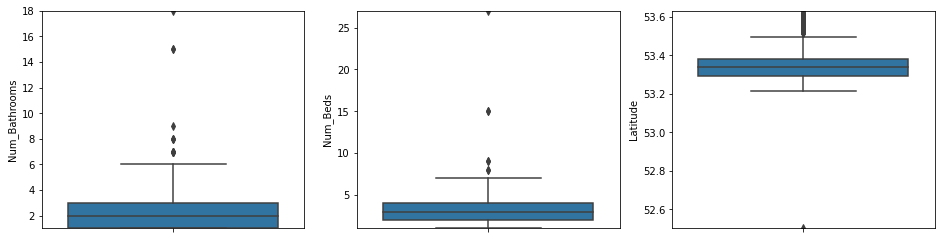

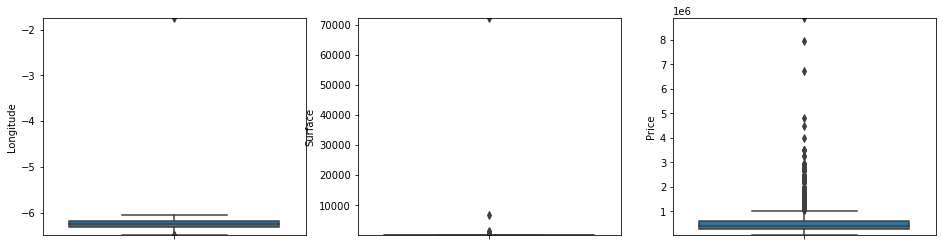

In [26]:
# Select numeric datatypes\
numeric_attr = df_train.select_dtypes(np.number).columns
print(f"Numeric variables: {numeric_attr}")

plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

We observe that there are very large outliers in **surface**, **Num_Bathrooms**, **Num_Beds** and **Price**.
We'll revivew each in turn. 

In [27]:
df_train.loc[df_train.Num_Bathrooms>12]

Location  Num_Bathrooms  Num_Beds BER_class  \
557       Inchicore             15        15        D1   
1099  Dun Laoghaire             15        15       NaN   
1378       Killiney             18        27       NaN   

                                            Description  \
557   umber 67 &amp; 69 Jamestown Road represent a f...   
1099  A truly unique stone built house of great qual...   
1378  The Grove is an imposing Victorian mansion bui...   

                                               Features   Latitude  Longitude  \
557   18 separate units\nTransport links including t...  53.335109  -6.331515   
1099  Lift servicing all floors\nVenetian and gothic...  53.287504  -6.146605   
1378  Approx. 1 490 sq. m / 16 041 sq. ft. of accomm...  53.260955  -6.117266   

               Type  Surface    Price  
557   semi-detached    318.2   775000  
1099       detached    700.0  1500000  
1378       detached   1490.0  4500000

The buildings with more than 12 bathrooms are the outliers in terms of bedrooms but are not the largest outliers in terms of price or surface. It is possible we could drop these without adversely affecting the model.

In [28]:
df_train.drop(df_train.loc[df_train.Num_Bathrooms>12].index, inplace=True)

In [29]:
df_train.loc[df_train.Longitude>-4]

Location  Num_Bathrooms  Num_Beds BER_class  \
355  Clondalkin              1         3       NaN   

                                           Description Features   Latitude  \
355  RAY COOKE AUCTIONEERS take great pleasure in i...     None  52.501856   

     Longitude           Type  Surface   Price  
355  -1.744995  semi-detached     79.0  199000

The property with the longitudinal outlier is also an outlier in latitude. The lat/long equates to Birmingham depiste being listed as Clondalkin. We will drop this outlier.

In [30]:
df_train.drop(df_train.loc[df_train.Longitude>-4].index, inplace=True)

In [31]:
df_train.loc[df_train.Surface>50000]

Location  Num_Bathrooms  Num_Beds BER_class  \
506   Swords              1         4        E1   

                                           Description Features   Latitude  \
506  Thornton Park is a superb modern equestrian ce...     None  53.474502   

     Longitude      Type      Surface    Price  
506  -6.343483  bungalow  72236.38714  1100000

The **Description** indicates that this is actually an equestrian centre which explains why the surface area is an outlier. We will drop this property.

In [32]:
df_train.drop(df_train.loc[df_train.Surface>50000].index, inplace=True)

In [33]:
df_train.describe()

Num_Bathrooms     Num_Beds     Latitude    Longitude      Surface  \
count    1633.000000  1633.000000  1633.000000  1633.000000  1633.000000   
mean        2.030006     3.013472    53.351019    -6.257897   124.240093   
std         1.087341     1.175137     0.073910     0.091787   186.218564   
min         1.000000     1.000000    53.215381    -6.497000     3.400000   
25%         1.000000     2.000000    53.294461    -6.309532    73.000000   
50%         2.000000     3.000000    53.341667    -6.247821    97.000000   
75%         3.000000     4.000000    53.382053    -6.194453   135.000000   
max         9.000000     9.000000    53.630588    -6.054719  6705.000000   

              Price  
count  1.633000e+03  
mean   5.514738e+05  
std    5.568198e+05  
min    1.999500e+04  
25%    2.950000e+05  
50%    3.950000e+05  
75%    5.950000e+05  
max    8.900000e+06

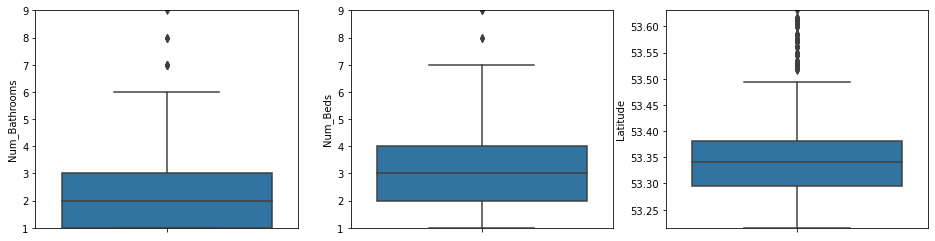

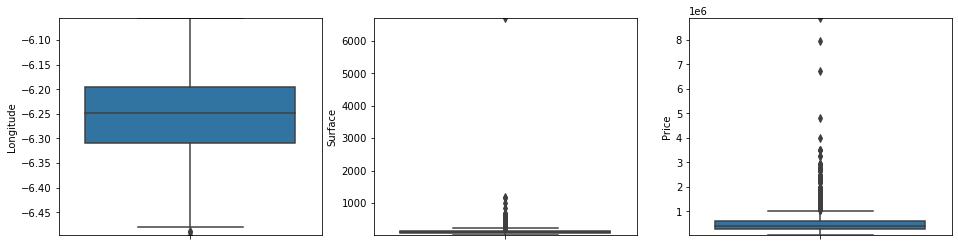

In [34]:
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

We'll scale the numeric features.

array([[<AxesSubplot:title={'center':'Num_Bathrooms'}>,
        <AxesSubplot:title={'center':'Num_Beds'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Surface'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

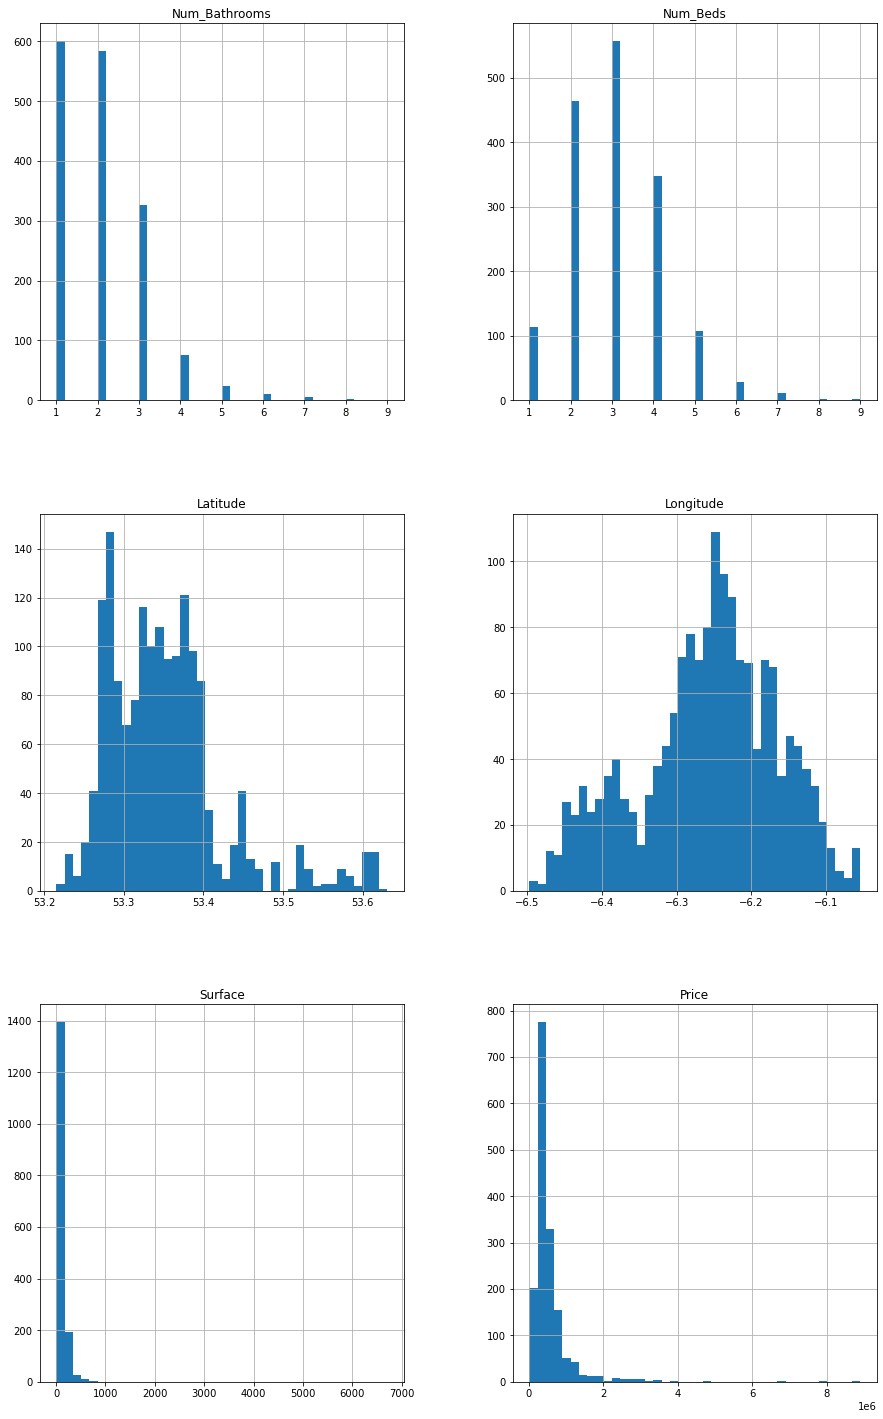

In [35]:
df_train[numeric_attr].hist(bins=40, figsize=[15,25])

**Num_Bathrooms**, **Num_Beds** and **Surface** are skewed. We'll use log transformation these and check if they are less skewed in this representation.

In [36]:
lst = ['Num_Bathrooms', 'Num_Beds', 'Surface']
for var in lst:
    var_min = df_train[var].min()
    df_train[var] = np.log(df_train[var]-var_min+1.0)

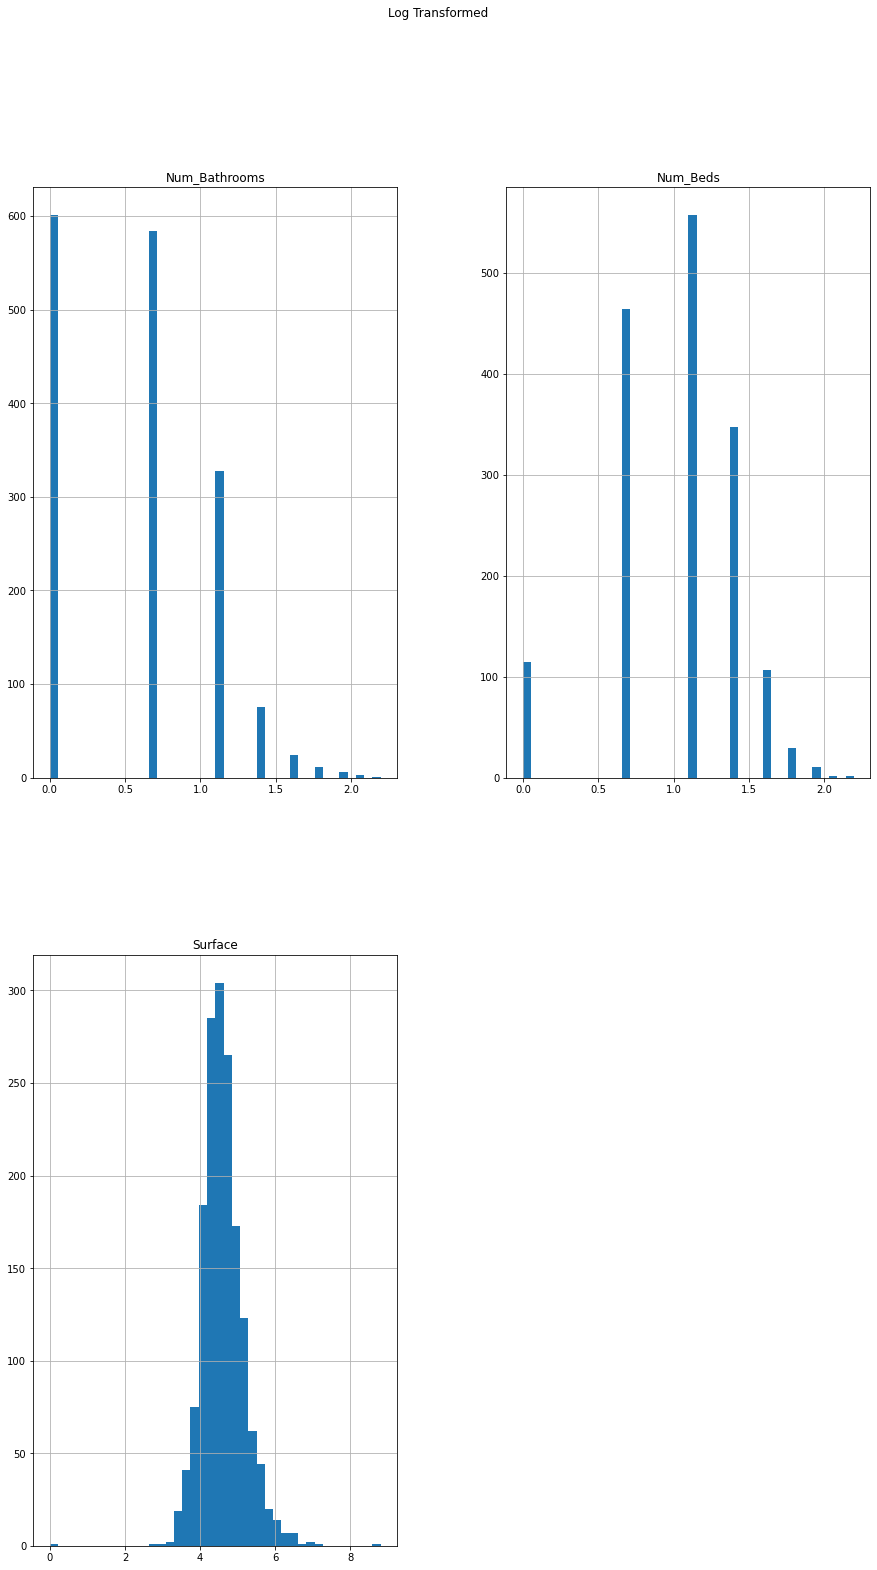

In [37]:
df_train[lst].hist(bins=40, figsize=[15,25])
plt.suptitle('Log Transformed')
plt.show()

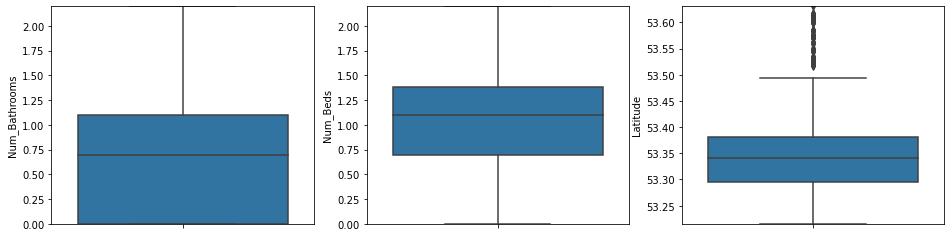

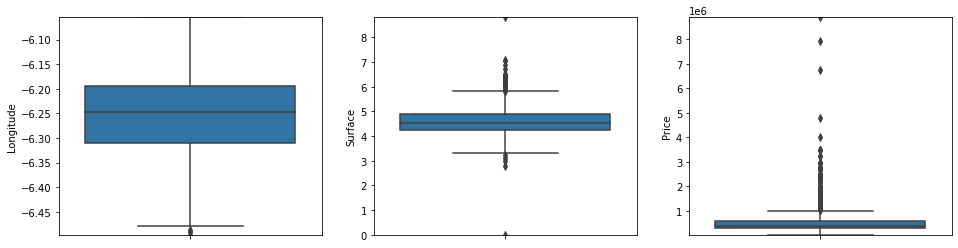

In [38]:
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

Following log transformation **Num_Bathrooms**, **Num_Beds** and **Surface** look less skewed.


### Encode Categorical Attributes

Our categorical attributes are **BER_class**, **Location** and **Type**. We'll aim to encode appropriately.  

The **BER_class** is an *ordinal* categorical variable. Using publicly available BER rating scale information and the content of the training dataset we produce the following ordinal mapping.

In [39]:
BER_class_mapper = {
    "A1": 0,
    "A2": 1,
    "A3": 2,
    "B1": 3,
    "B2": 4,
    "B3": 5,
    "C1": 6,
    "C2": 7,
    "C3": 8,
    "D1": 9,
    "D2": 10,
    "E1": 11,
    "E2": 12,
    "F": 13,
    "G": 14,
    "SINo666of2006exempt": 15
}

df_train.BER_class = df_train.BER_class.replace(BER_class_mapper)

In [40]:
# We'll update numeric attributes to include BER_class
numeric_attr = df_train.select_dtypes(np.number).columns
print(f"Numeric variables: {numeric_attr}")

Numeric variables: Index(['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude', 'Longitude',
       'Surface', 'Price'],
      dtype='object')


We'll view the distribution of BER_class to see if needs to be transformed to become more noramlized.

array([[<AxesSubplot:title={'center':'BER_class'}>]], dtype=object)

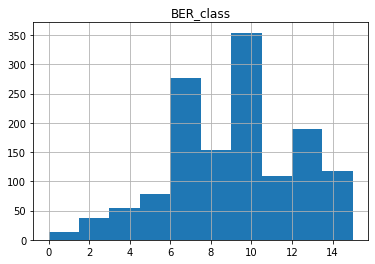

In [41]:
df_train.hist(column='BER_class')

**BER_class** looks slightly skewed but quite reasonable so we will not perform a transformation on it.  

The **Location** feature represents what is typically deemed to be of high priority for real estate. However this is represented more accurately by the **Longitude** and **Latitude** features so we will not include it.  

We will one-hot encode the **Type** categorical variable deeming it to be a nominal categorical variable although perhaps it could be argued that it is ordinal for the purpose of house prices.  

In [42]:
df_train.drop(['Location'], axis=1, inplace=True)

In [43]:
df_train = pd.get_dummies(df_train, drop_first=True, columns=['Type'])

In [44]:
df_train.head()

Num_Bathrooms  Num_Beds  BER_class  \
0       0.693147  0.693147        8.0   
1       0.000000  0.693147        9.0   
2       1.098612  1.098612        2.0   
3       0.000000  1.098612       11.0   
4       1.098612  1.386294        9.0   

                                         Description  \
0  DNG are delighted to present to the market no....   
1  13 Northbrook Terrace is a charming red brick ...   
2  Welcome to No. 6 Cotter Close, an immaculately...   
3  Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...   
4  'Four Seasons' comes to the market as a wonder...   

                                            Features   Latitude  Longitude  \
0                                               None  53.396659  -6.438791   
1  Bight and Spacious interior\nNumerous original...  53.357129  -6.239779   
2  Special Features\nLarge rear garden\nGenerous ...  53.266468  -6.222771   
3  Wonderful 3 bed detached bungalow.     \nAccom...  53.261600  -6.166738   
4  Detached Property      \nDouble Glazed Windows...  53.550731  -6.121415   

    Surface   Price  Type_bungalow  Type_detached  Type_duplex  \
0  4.168214  195000              0              0            0   
1  4.538710  425000              0              0            0   
2  4.650144  535000              0              0            0   
3  4.364372  499000              0              1            0   
4  5.014627  510000              0              1            0   

   Type_end-of-terrace  Type_semi-detached  Type_site  Type_studio  \
0                    0                   0          0            0   
1                    0                   0          0            0   
2                    0                   1          0            0   
3                    0                   0          0            0   
4                    0                   0          0            0   

   Type_terraced  Type_townhouse  
0              0               0  
1              1               0  
2              0               0  
3              0               0  
4              0               0

We now look for correlations between our response variable **Price** and possible explanatory variables using a heatmap of our reduced dataset.

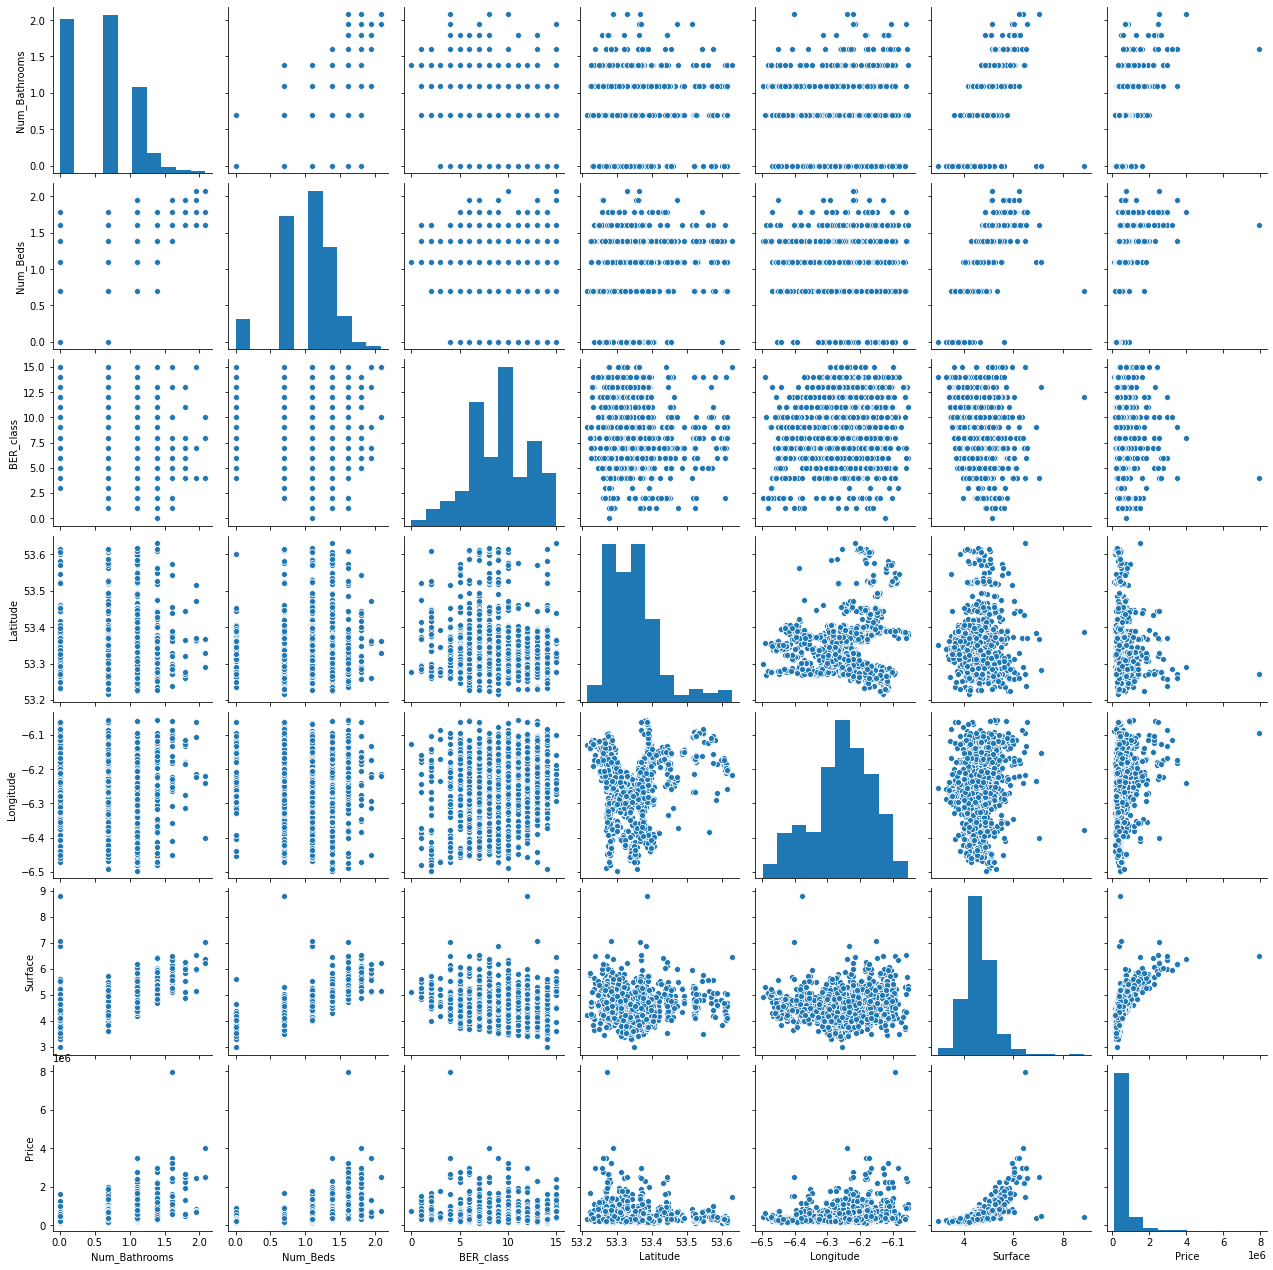

In [45]:
# Provide pairplot to show trends and correlations
sns.pairplot(data=df_train[numeric_attr].dropna())
plt.show()

<AxesSubplot:>

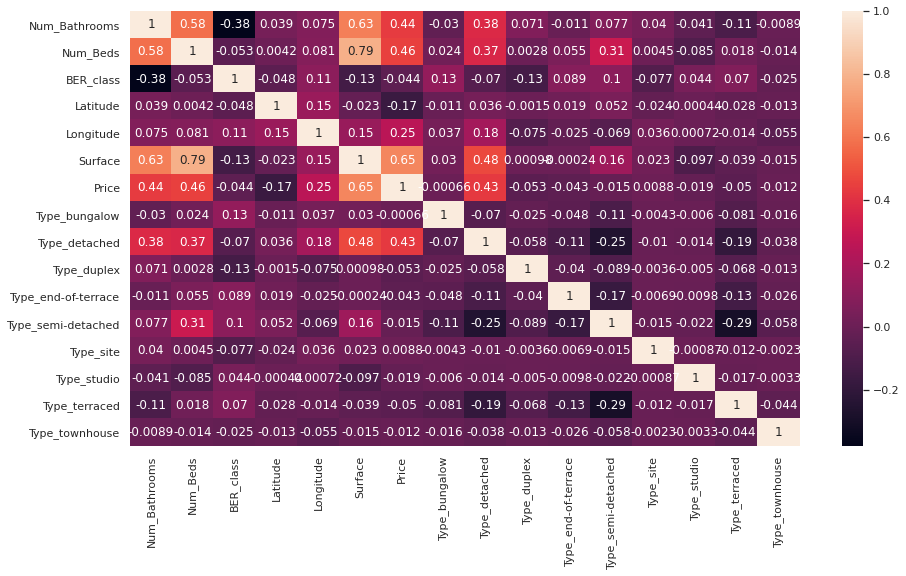

In [46]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_train.corr(), annot = True)

The most influential explanatory variables are **Surface**, **Num_Beds**, **Num_Bathrooms** and house type **Type_detatched** followed at a distance by **Longitude** and, with negative correlation, **Latitude**.

We provide a data cleaning helper routine.

In [47]:
def house_price_data_feature_prep(df:pd.DataFrame, exclude_outliers:bool=False) -> pd.DataFrame:
    """Perform preparation of features on the housing test dataset as
    previously performed on the training dataset.
    
    Args:
        df: Dataframe of test data to prepare
        exclude_outliers: Exclude outliers from dataset
    Return:
        Prepared test dataframe
    """
    # Drop unnecessary columns
    df.drop(['ID', 'Index'], axis=1, inplace=True)
    
    # Drop 'Services' as was 60+% empty in training set
    df.drop(['Services'], axis=1, inplace=True)
    
    # Drop 'Location' as 'Latitude' and 'Longitude' will represent this
    df.drop(['Location'], axis=1, inplace=True)
    
    if exclude_outliers:
        # Drop large number of bathrooms
        df.drop(df.loc[df.Num_Bathrooms>12].index, inplace=True)
        
        # Drop locations with latitude/longitude outside 6 standard deviations from mean
        latitude_std = df.Latitude.std()
        latitude_mean = df.Latitude.mean()
        df.drop(df.loc[(df.Latitude>(latitude_mean+6*latitude_std)) | (df.Latitude<(latitude_mean-6*latitude_std))].index, inplace=True)

        longitude_std = df.Longitude.std()
        longitude_mean = df.Longitude.mean()
        df.drop(df.loc[(df.Longitude>(longitude_mean+6*longitude_std)) | (df.Longitude<(longitude_mean-6*longitude_std))].index, inplace=True)
    
    # Perform log transformation on following features
    lst = ['Num_Bathrooms', 'Num_Beds', 'Surface']
    for var in lst:
        var_min = df[var].min()
        df[var] = np.log(df[var]-var_min+1.0)
        
    # Ordinal mapping of 'BER_class'
    df.BER_class = df.BER_class.replace(BER_class_mapper)
    
    # One-hot encoding of house 'Type'
    df = pd.get_dummies(df, drop_first=True, columns=['Type'])
    
    return df

---  
### Train Validation Dataset Split  

To inform of us of our model capability we will split the training dataset into a training and validation dataset. We will use the validation dataset to inform us on our model prediction capability prior to using a final version on the test dataset.  

From our analysis above we will train on the following features:  
**Surface**, **Num_Beds**, **Num_Bathrooms**, **Type_detatched**,**Longitude** and **Latitude**.  

Note that from this point onwards, until we re-train on the full dataset, `train` refers to a portion of the original training dataset.

In [48]:
df_train = pd.read_csv(training_file)
df_train_prepd = house_price_data_feature_prep(df_train, exclude_outliers=True)
feature_set = ['Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Longitude', 'Latitude']

X_train_prepd = df_train_prepd[feature_set]
y_train_prepd = df_train_prepd[['Price']]

X_train, X_val, y_train, y_val = train_test_split(X_train_prepd, y_train_prepd, test_size=0.2, random_state=42)

print(f"X_train shape:{X_train.shape}, X_val shape:{X_val.shape}, y_train shape:{y_train.shape}, y_val shape:{y_val.shape}")

X_train shape:(1307, 6), X_val shape:(327, 6), y_train shape:(1307, 1), y_val shape:(327, 1)


---  
### Bayesian Linear Regression  
  

In [49]:
def generate_bayesian_lin_reg_model(
    alpha: dict={'mu':0, 'sigma':30},
    beta: dict={'mu':0, 'sigma':30},
    sigma: dict={'beta':5},
    iteration_cnt: int=40000,
    sample_cnt: int=5000,
    X: np.ndarray=None,
    y: np.ndarray=None
    ):
    """Generate a Bayesian linear regression model
    
    alpha, beta defined as normal distributions
    sigma defined as HalfCauchy distribution
    
    Args:
        alpha: dict containing mu and sigma values for alpha normal distribution
        beta: dict containing mu and sigma values for beta normal distribution
        sigma: dict containing sigma value for sigma HalfCauchy distribution
        iteration_cnt: int iteration count for bayesian linear reg. model fit
        sample_cnt: int sample count drawn from posterior
        X: np.ndarray of training data
        y: np.ndarray of labels

    Returns:
        Approximation for the model
        Posterior for the bayesian linear regression model
    """
    with pm.Model() as model:
        # prior over the parameters of linear regression
        _alpha = pm.Normal('alpha', mu=alpha['mu'], sigma=alpha['sigma'])
        # we have a beta for each column of Xn
        _beta = pm.Normal('beta', mu=beta['mu'], sigma=beta['sigma'], shape=X.shape[1])
        # prior over the variance of the noise
        _sigma = pm.HalfCauchy('sigma_n', beta=sigma['beta'])
        # linear regression relationship
        #linear regression model in matrix form
        _mu = _alpha + pm.math.dot(_beta, X.T)
        # likelihood 
        like = pm.Normal('like', mu=_mu, sigma=_sigma, observed=y[:,0])
  
    with model:
        # iterations of the algorithm
        approximation = pm.fit(iteration_cnt, method='advi')

    # samples from the posterior    
    posterior = approximation.sample(sample_cnt)
    return posterior, approximation

In [50]:
# Helper functions

def blr(
    posterior,
    yscaler,
    test,
    ):
    """Calculate BLR value
    
    Args:
        posterior: pymc3 MultiTrace, sampled data from posterior belief
        yscaler: StandardScaler
        test: np.ndarray, test data

    Return:
        BLR value
    """
    y_pred_blr = np.exp(yscaler.inverse_transform(np.mean(posterior['alpha']) 
              + np.dot(np.mean(posterior['beta'],axis=0), test.T)))
    return y_pred_blr

def mae(
    y_pred_blr,
    y_test
    ):
    """Calculate MAE value
    
    Args:
        y_pred_blr: blr value
        y_test: y values of test set
    Return:
        MAE value
    """
    mae = np.mean(abs(y_pred_blr - y_test))
    return mae

def mape(
    y_pred_blr,
    y_test
    ):
    """Calculate MAPE value
    
    Args:
        y_pred_blr: blr value
        y_test: y values of test set
    Return:
        MAPE value
    """
    mape = np.mean(abs(y_pred_blr - y_test) / y_test)
    return mape

<AxesSubplot:title={'center':'House price histogram, training set'}, xlabel='Price', ylabel='Number of houses'>

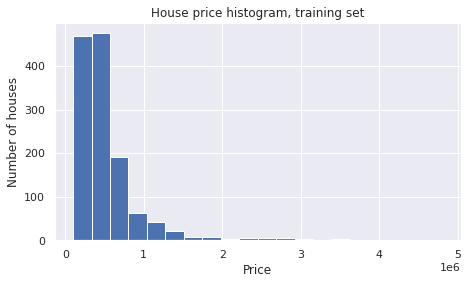

In [51]:
# Plot Price
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("House price histogram, training set")
ax1.set_xlabel('Price')
ax1.set_ylabel('Number of houses')
y_train['Price'].hist(bins=20)

As the house price is skewed we perform a transform on it.

In [52]:
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
# It suits us to switch y_val to a single dimension shape as we'll use predictions in this shape also.
y_val = (y_val.values)[:,0]    

In [53]:
print(f"X_train shape:{X_train.shape}, X_val shape:{X_val.shape}, y_train shape:{y_train.shape}, y_val shape:{y_val.shape}")

X_train shape:(1307, 6), X_val shape:(327, 6), y_train shape:(1307, 1), y_val shape:(327,)


In [54]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([X_train, X_train[:,[0]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_val = np.hstack([X_val, X_val[:,[0]]**2])
Xn_val = xscaler.transform(Xss_val)

In [55]:
ylog = np.log(y_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

(array([  1.,   1.,  15.,  69., 157., 158., 223., 181., 141., 101.,  91.,
         60.,  34.,  29.,  10.,   8.,  12.,  11.,   3.,   2.]),
 array([-2.56794584, -2.23208792, -1.89622999, -1.56037206, -1.22451413,
        -0.8886562 , -0.55279827, -0.21694034,  0.11891759,  0.45477552,
         0.79063345,  1.12649138,  1.46234931,  1.79820724,  2.13406517,
         2.4699231 ,  2.80578103,  3.14163896,  3.47749689,  3.81335482,
         4.14921274]),
 <BarContainer object of 20 artists>)

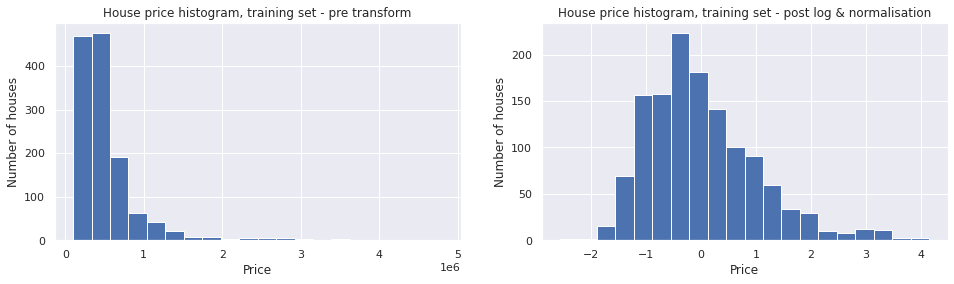

In [56]:
# Plot Price
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("House price histogram, training set - pre transform")
ax1.set_xlabel('Price')
ax1.set_ylabel('Number of houses')
ax1.hist(y_train, bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("House price histogram, training set - post log & normalisation")
ax3.set_xlabel('Price')
ax3.set_ylabel('Number of houses')
ax3.hist(yn_train, bins=20)

Finished [100%]: Average Loss = 1,082.4


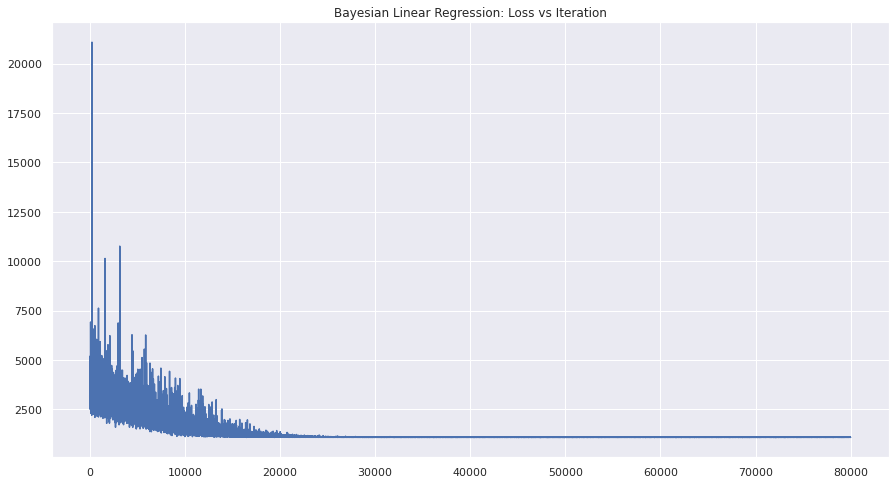

In [57]:
posterior, approximation = generate_bayesian_lin_reg_model(X=Xn_train, y=yn_train,
                                                           iteration_cnt=80000, sample_cnt=5000)
# check the convergence
plt.title('Bayesian Linear Regression: Loss vs Iteration')
plt.plot(approximation.hist);

We perform prediction on the validation dataset.

In [58]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_val_pred = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

In [59]:
print(f"y_val_pred shape:{y_val_pred.shape}, y_val shape:{y_val.shape}")

y_val_pred shape:(327,), y_val shape:(327,)


In [60]:
full_model_mae = mae(y_val_pred, y_val)
full_model_mape = mape(y_val_pred, y_val)
print(f"MAE: {full_model_mae:.0f}, MAPE: {full_model_mape:.4f}")

MAE: 199182, MAPE: 0.2557


---  
### Piecewise Bayesian Linear Regression  
  

We'll now perform **Piecewise Linear Regression** to see if we can improve our score.  

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

In [61]:
def model_predict(
    posterior,
    X,
    nsamples,
    yscaler
    ):
    """Generate model predictions
    
    Args:
        posterior: pymc3 MultiTrace, sampled data from posterior belief
        X: np.ndarray, training data
        nsamples: int, number of samples to select from posterior
        yscaler: StandardScaler
    Return:
        Preditions
    """
    Ypred = yscaler.inverse_transform(ppc(posterior['alpha'], posterior['beta'], posterior['sigma_n'],
                                          X, nsamples=nsamples))
    return Ypred
    
def plot_model_pred_vs_observations(
    predictions=None,
    log_labels=None,
    title=None
    ):
    """Plot the model predictions against the actual observations
    
    Args:
        predictions: np.ndarray, model predictions
        log_labels: np.ndarray, log of y labels
    Return:
        None
    
    """
    for i in range(predictions.shape[0]):
        az.plot_dist(predictions[i,:], color='r', plot_kwargs={"linewidth": 0.2})
    az.plot_dist(predictions[i,:], color='r', plot_kwargs={"linewidth": 0.2}, label="prediction")
    az.plot_dist(log_labels, label='true observations');
    plt.legend()
    plt.xlabel("log(y) - output variable")
    plt.ylabel("density plot")
    plt.title(title, fontsize=20)

In [62]:
def prep_cluster_data(
    train_data: np.ndarray=None,
    test_data: np.ndarray=None,
    label_data: np.ndarray=None,
    clusters_train_labels: np.ndarray=None,
    clusters_test_labels: np.ndarray=None,
    idx: int=0
    ):
    """Return cluster specific training and test data from all clustered data.
       The training data has already been clustered and we wish to separate it
       into training data specific to a single cluster as defined by 'idx'
    
    Args:
        train_data: np.ndarray containing all clustered training data
        test_data: np.ndarray containing all clustered test data
        label_data: np.ndarray containing all label data
        clusters_train_labels: np.ndarray containing all cluster train labels (data belonging to which cluster)
        clusters_test_labels: np.ndarray containing all cluster tsst labels (data belonging to which cluster)
        idx: int index of which cluster to return
    Returns:
        np.ndarray: cluster specific training data
        np.ndarray: cluster specific test data - None will be returned if test_data has not been provided.
        np.ndarray: log of label data specific to cluster
        StandardScaler: scaler for label data
        np.ndarray: transformed log of label data
    """
    Xn = train_data[clusters_train_labels==idx,:]
    if test_data is not None:
        Xtestn = test_data[clusters_test_labels==idx,:]
    else:
        Xtestn = None
    
    ylog = np.log(label_data.astype('float')[clusters_train_labels==idx,:])
    yscaler = StandardScaler().fit(ylog)
    yn = yscaler.transform(ylog)
    
    return Xn, Xtestn, ylog, yscaler, yn

In [63]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    """Generate posterior predictive checks for Bayesian Linear Regression model
    
    Args:
        alpha: posterior for alpha
        beta: posterior for beta
        sigma: posterior for sigma
        X: np.ndarray of data to predict upon
        nsamples: number of random samples to draw from eash posterior
    """
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

## Clustering

In [64]:
inertia = []
for k in range(1,15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    inertia.append(clustered_data_sklearn.inertia_)

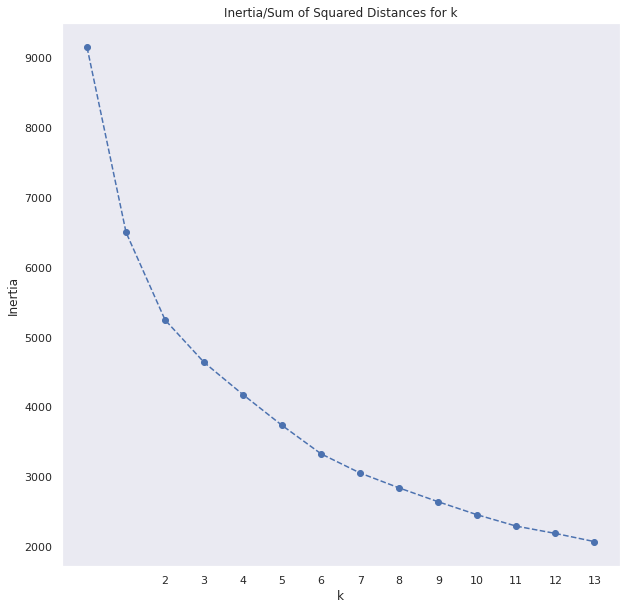

In [65]:
plt.figure(figsize=(10,10))
plt.title('Inertia/Sum of Squared Distances for k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2, 30))
plt.grid()
plt.plot(inertia, linestyle='--', marker='o', color='b')

In [66]:
# As per website: https://realpython.com/k-means-clustering-python/#choosing-the-appropriate-number-of-clusters 
silhouette_coefficients = []
   
# Start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    score = silhouette_score(Xn_train, clustered_data_sklearn.labels_)
    silhouette_coefficients.append(score)

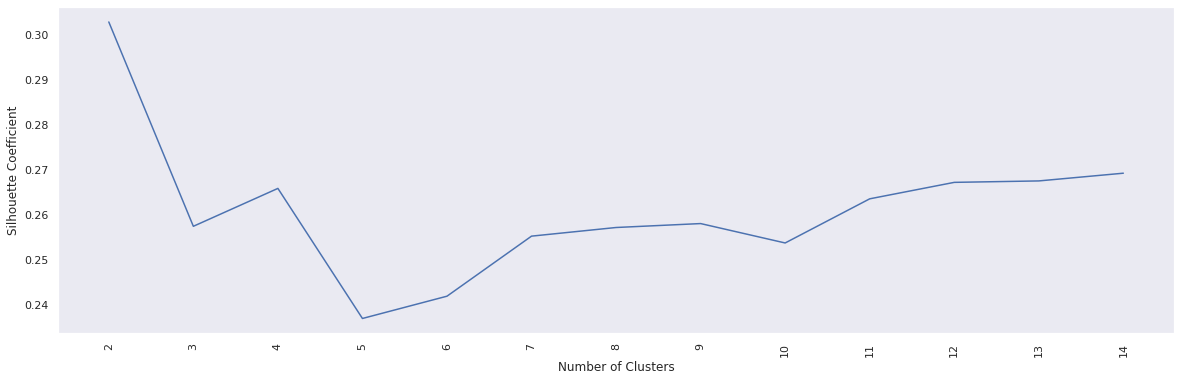

In [67]:
plt.figure(figsize=(20,6))
plt.plot(range(2,15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xticks(rotation=90)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show() 

In reviewing k-means for different number of clusters we see a knee point of approximately 4. This implies we should use 4 clusters.  

With the silhouette score (Rousseeuw, P. J.) we look for the maximum value and at which number of clusters it occurs. Here we see a maximum value occuring at 4 clusters.  
  
The silhouette method scoring function uses inter-cluster and intra-cluster distances. The elbow method only uses intra-cluster distances. This can explain the difference in suggested cluster number between the two methods.  

We will try 4 clusters given our results from elbow and silhouette methods.

We will trial clustering by GMM using discrete and continuous features (Solanki, G.). Previously we saw the features in order of importance were **beds**, **bathrooms**, **longitude** and **latitude**.  
**beds** and **bathrooms** are discrete numbered features whereas **longitude** and **latitude** are continuous.

In [68]:
print(f"feature set:{feature_set}")

feature set:['Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Longitude', 'Latitude']


Text(0.5, 1.0, 'GMM clustering, 4x clusters')

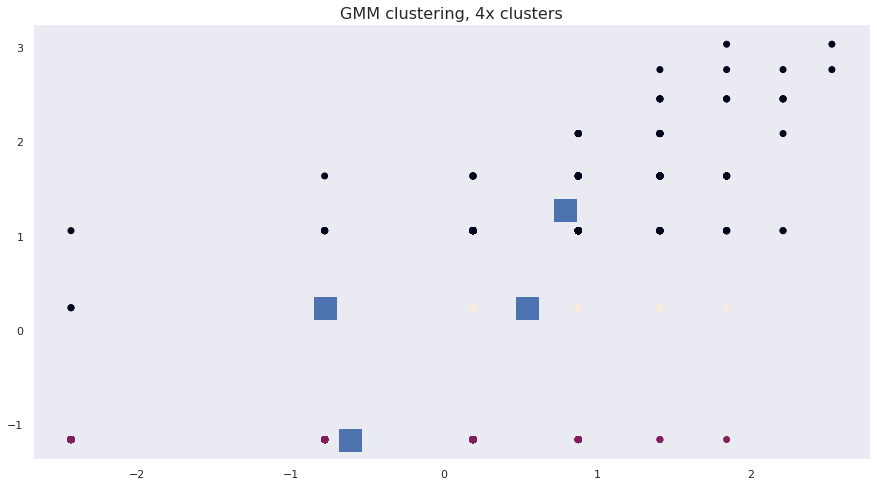

In [69]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# clustering by features Num_Beds, Num_Bathrooms 
ind=[1, 2]
X_ind = Xn_train[:, ind]

# Gaussian Mixture
gmm.fit(X_ind)
plt.grid()

# Predict the training data so we can label the dots
labels = gmm.predict(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1], c=labels)

# centroids
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], marker="s", s=22**2)
plt.title('GMM clustering, 4x clusters', fontsize=16)

We now trial clustering on continuous data. We choose **longitude** and **latitude** of our list of most influential variables.

Text(0.5, 1.0, 'GMM clustering by "latitude" and "longitude", 4 x clusters')

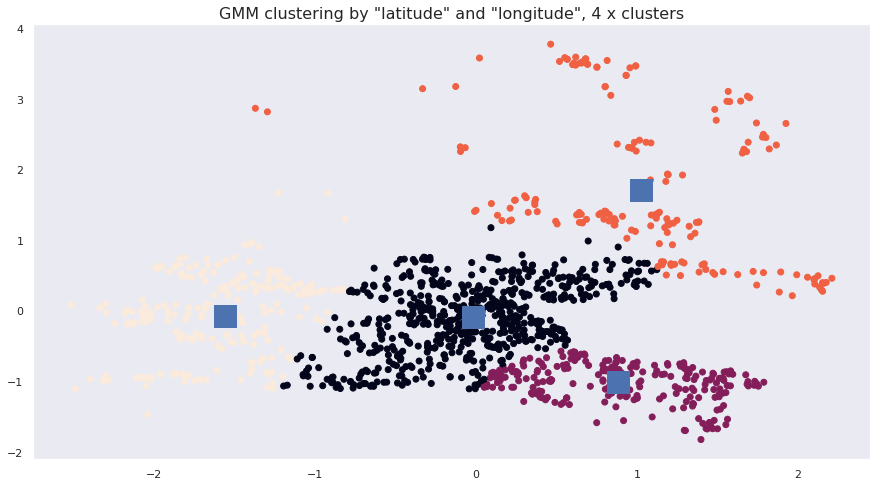

In [70]:
gmm = GaussianMixture(n_components=4, random_state=20)

# clustering by features surface, latitude and longitude 
ind=[4, 5]
X_ind = Xn_train[:,ind]

# Gaussian Mixture
gmm.fit(X_ind)
plt.grid()

# Predict the training data so we can label the dots
labels = gmm.predict(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1], c=labels)

# centroids
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], marker="s", s=22**2)
plt.title('GMM clustering by "latitude" and "longitude", 4 x clusters', fontsize=16)

This clustering looks reasonable visually with perhaps some outliers still present given a small number of isolated points.

In [71]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 639, 1: 244, 2: 184, 3: 240}

In [72]:
# validation clusters
clusters_val = gmm.predict(Xn_val[:,ind])
unique_val, counts_val = np.unique(clusters_val, return_counts=True)
dict(zip(unique_val, counts_val))

{0: 169, 1: 51, 2: 53, 3: 54}

In [73]:
Xn0, Xvaln0, ylog0, yscaler0, yn0 = prep_cluster_data(
    Xn_train, Xn_val, y_train, clusters_train, clusters_val, 0)

In [74]:
Xn1, Xvaln1, ylog1, yscaler1, yn1 = prep_cluster_data(
    Xn_train, Xn_val, y_train, clusters_train, clusters_val, 1)

In [75]:
Xn2, Xvaln2, ylog2, yscaler2, yn2 = prep_cluster_data(
    Xn_train, Xn_val, y_train, clusters_train, clusters_val, 2)

In [76]:
Xn3, Xvaln3, ylog3, yscaler3, yn3 = prep_cluster_data(
    Xn_train, Xn_val, y_train, clusters_train, clusters_val, 3)

In [77]:
posterior0, _ = generate_bayesian_lin_reg_model(X=Xn0, y=yn0)

Finished [100%]: Average Loss = 542.98


In [78]:
posterior1, _ = generate_bayesian_lin_reg_model(X=Xn1, y=yn1)

Finished [100%]: Average Loss = 207.91


In [79]:
posterior2, _ = generate_bayesian_lin_reg_model(X=Xn2, y=yn2)

Finished [100%]: Average Loss = 154.92


In [80]:
posterior3, _ = generate_bayesian_lin_reg_model(X=Xn3, y=yn3)

Finished [100%]: Average Loss = 212.49


### Only Cluster 0

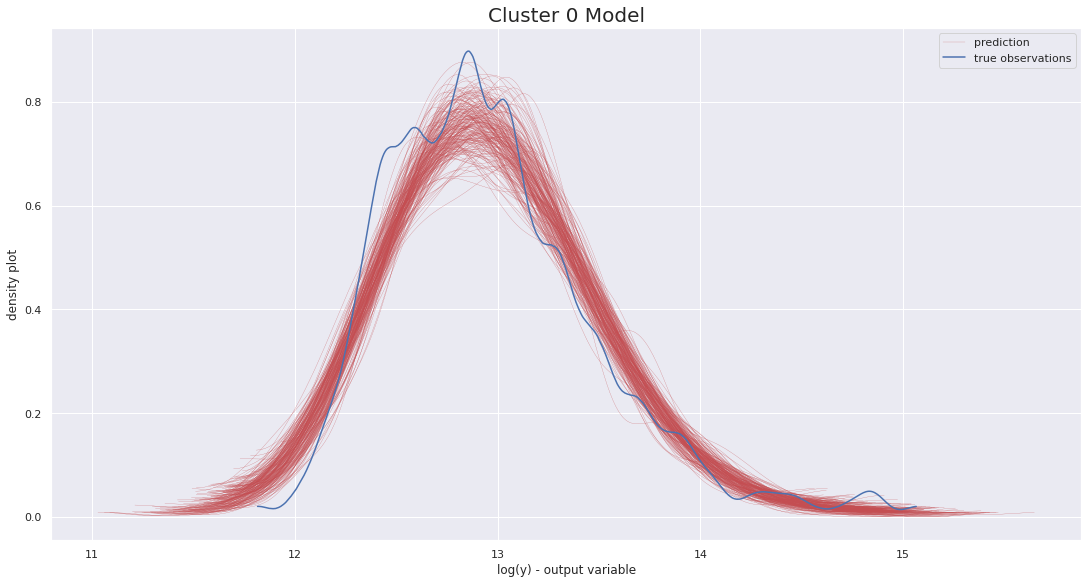

In [81]:
Ypred0 = model_predict(posterior0, Xn0, 200, yscaler0)
plot_model_pred_vs_observations(Ypred0, ylog0, "Cluster 0 Model")

In [82]:
Ypred0.shape

(200, 639)

### Only Cluster 1

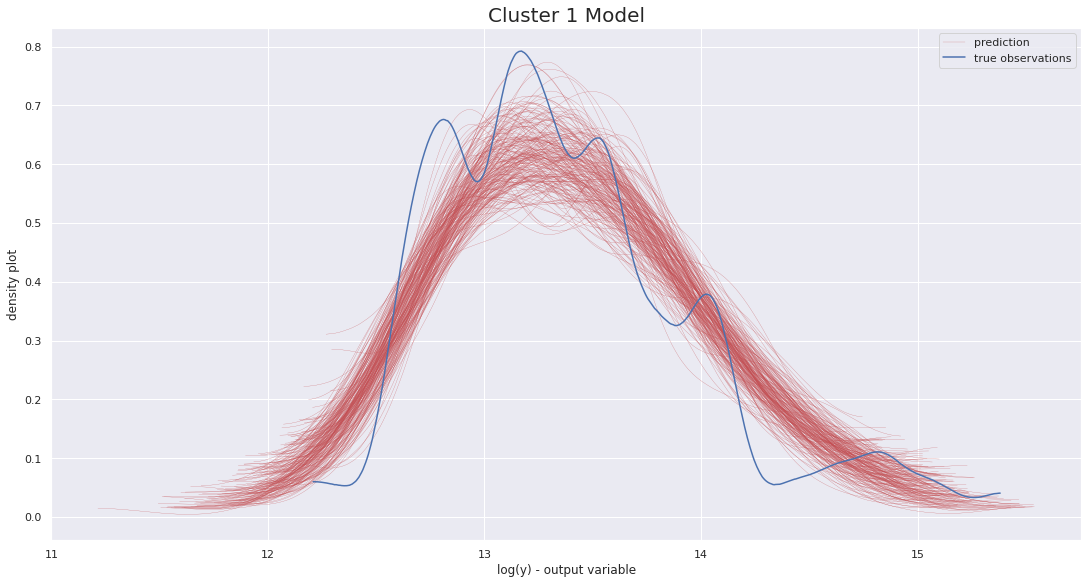

In [83]:
Ypred1 = model_predict(posterior1, Xn1, 200, yscaler1)
plot_model_pred_vs_observations(Ypred1, ylog1, "Cluster 1 Model")

### Only Cluster 2

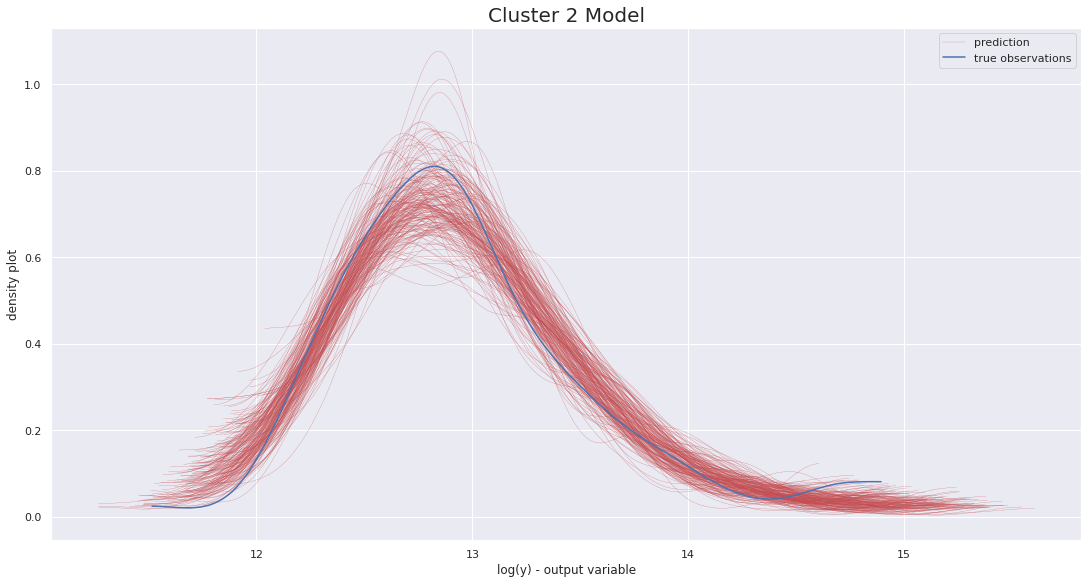

In [84]:
Ypred2 = model_predict(posterior2, Xn2, 200, yscaler2)
plot_model_pred_vs_observations(Ypred2, ylog2, "Cluster 2 Model")

### Only Cluster 3

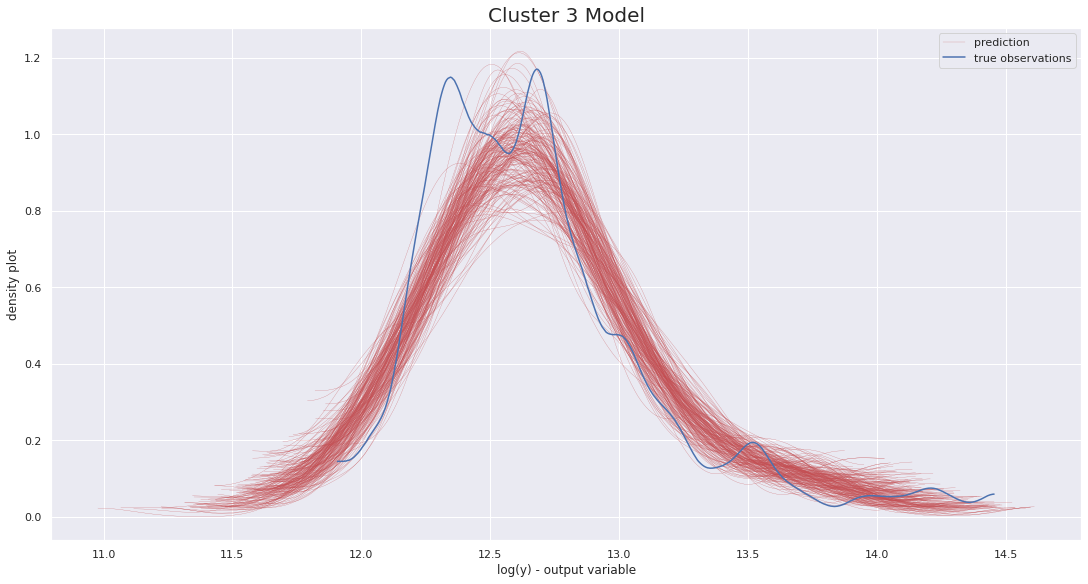

In [85]:
Ypred3 = model_predict(posterior3, Xn3, 200, yscaler3)
plot_model_pred_vs_observations(Ypred3, ylog3, "Cluster 3 Model")

## Overall

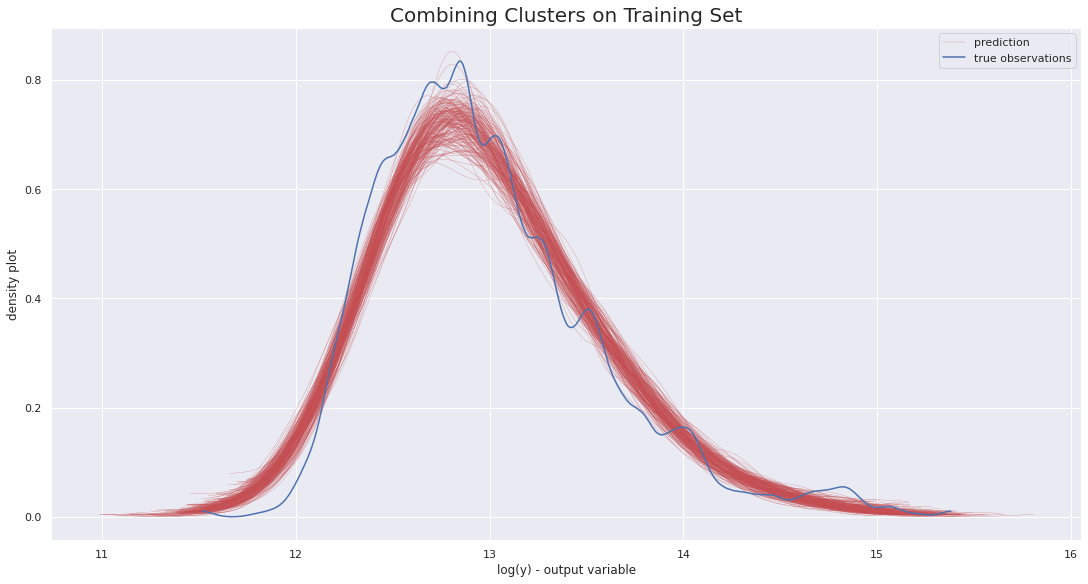

In [86]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])
ylog=np.vstack([ylog0, ylog1, ylog2, ylog3])

plot_model_pred_vs_observations(Ypred, ylog, "Combining Clusters on Training Set")

## Validation Set Performance

In [87]:
# cluster 0
y_pred_BLR0 = blr(posterior0, yscaler0, Xvaln0)
mae_ = mae(y_pred_BLR0, y_val[clusters_val==0])
mape_ = mape(y_pred_BLR0, y_val[clusters_val==0])
print(f"Size Cluster0: {np.sum(clusters_val==0)},\tMAE: {mae_:.0f}, MAPE: {mape_:.4f}")

# cluster 1
y_pred_BLR1 = blr(posterior1, yscaler1, Xvaln1)
mae_ = mae(y_pred_BLR1, y_val[clusters_val==1])
mape_ = mape(y_pred_BLR1, y_val[clusters_val==1])
print(f"Size Cluster1: {np.sum(clusters_val==1)},\tMAE: {mae_:.0f}, MAPE: {mape_:.4f}")

# cluster 2
y_pred_BLR2 = blr(posterior2, yscaler2, Xvaln2)
mae_ = mae(y_pred_BLR2, y_val[clusters_val==2])
mape_ = mape(y_pred_BLR2, y_val[clusters_val==2])
print(f"Size Cluster2: {np.sum(clusters_val==2)},\tMAE: {mae_:.0f}, MAPE: {mape_:.4f}")

# cluster 3
y_pred_BLR3 = blr(posterior3, yscaler3, Xvaln3)
mae_ = mae(y_pred_BLR3, y_val[clusters_val==3])
mape_ = mape(y_pred_BLR3, y_val[clusters_val==3])
print(f"Size Cluster3: {np.sum(clusters_val==3)},\tMAE: {mae_:.0f}, MAPE: {mape_:.4f}")

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_val[clusters_val==0]),
                 abs(y_pred_BLR1 - y_val[clusters_val==1]),
                 abs(y_pred_BLR2 - y_val[clusters_val==2]),
                 abs(y_pred_BLR3 - y_val[clusters_val==3])])

# joint MAPE
joint_MAPE=np.hstack([abs(y_pred_BLR0 - y_val[clusters_val==0]) / y_val[clusters_val==0],
                     abs(y_pred_BLR1 - y_val[clusters_val==1]) / y_val[clusters_val==1],
                     abs(y_pred_BLR2 - y_val[clusters_val==2]) / y_val[clusters_val==2],
                     abs(y_pred_BLR3 - y_val[clusters_val==3]) / y_val[clusters_val==3]])
print(f"Joint MAE:\t{np.mean(joint):.0f}, MAPE: {np.mean(joint_MAPE):.4f}")
print(f"Full model MAE:\t{full_model_mae:.0f}, MAPE: {full_model_mape:.4f}")

Size Cluster0: 169,	MAE: 167804, MAPE: 0.2444
Size Cluster1: 51,	MAE: 321948, MAPE: 0.2112
Size Cluster2: 53,	MAE: 94374, MAPE: 0.1721
Size Cluster3: 54,	MAE: 86900, MAPE: 0.1760
Joint MAE:	166583, MAPE: 0.2162
Full model MAE:	199182, MAPE: 0.2557


We see that the piecewise Bayesian linear regression model outperforms the single Bayesian linear regression model on our validation dataset given the lower **MAE** and **MAPE** scores.    

---
### Re-train with Full Training Dataset  

We performed training of the single and piecewise BLR models using a split training set. We will now repeat the training using our full training dataset and perform prediction on the test dataset for which we do not have the actual prices.

In [88]:
df_train = pd.read_csv(training_file)
df_train_prepd = house_price_data_feature_prep(df_train, exclude_outliers=True)

feature_set = ['Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Longitude', 'Latitude']

X_train_prepd = df_train_prepd[feature_set]
y_train_prepd = df_train_prepd[['Price']]

X_train = X_train_prepd.values
y_train = y_train_prepd.values


print(f"X_train shape:{X_train.shape},y_train shape:{y_train.shape}")

X_train shape:(1634, 6),y_train shape:(1634, 1)


Finished [100%]: Average Loss = 1,330.9


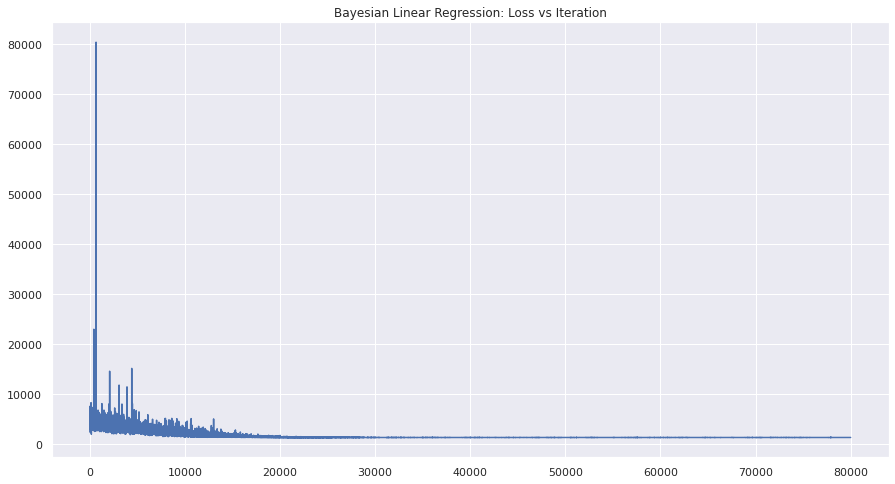

In [89]:
# Train single BLR model

# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([X_train, X_train[:,[0]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

ylog = np.log(y_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

posterior, approximation = generate_bayesian_lin_reg_model(X=Xn_train, y=yn_train,
                                                           iteration_cnt=80000, sample_cnt=5000)
# check the convergence
plt.title('Bayesian Linear Regression: Loss vs Iteration')
plt.plot(approximation.hist);

Text(0.5, 1.0, 'GMM clustering by "latitude" and "longitude", 4 x clusters')

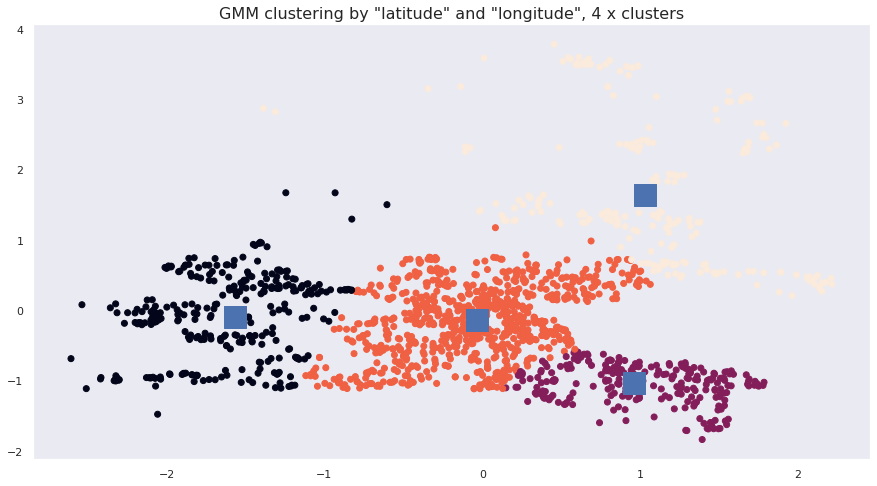

In [90]:
# Train piecewise BLR model - first fit clustering on all training samples

gmm = GaussianMixture(n_components=4, random_state=20)

# clustering by features surface, latitude and longitude 
ind=[4, 5]
X_ind = Xn_train[:,ind]

# Gaussian Mixture
gmm.fit(X_ind)
plt.grid()

# Predict the training data so we can label the dots
labels = gmm.predict(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1], c=labels)

# centroids
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], marker="s", s=22**2)
plt.title('GMM clustering by "latitude" and "longitude", 4 x clusters', fontsize=16)

In [91]:
# Train piecewise BLR model

# predict train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)

Xn0, _, ylog0, yscaler0, yn0 = prep_cluster_data(
    Xn_train, None, y_train, clusters_train, clusters_val, 0)
Xn1, _, ylog1, yscaler1, yn1 = prep_cluster_data(
    Xn_train, None, y_train, clusters_train, clusters_val, 1)
Xn2, _, ylog2, yscaler2, yn2 = prep_cluster_data(
    Xn_train, None, y_train, clusters_train, clusters_val, 2)
Xn3, _, ylog3, yscaler3, yn3 = prep_cluster_data(
    Xn_train, None, y_train, clusters_train, clusters_val, 3)

print("Generate posterior0")
posterior0, _ = generate_bayesian_lin_reg_model(X=Xn0, y=yn0)
print("Generate posterior1")
posterior1, _ = generate_bayesian_lin_reg_model(X=Xn1, y=yn1)
print("Generate posterior2")
posterior2, _ = generate_bayesian_lin_reg_model(X=Xn2, y=yn2)
print("Generate posterior3")
posterior3, _ = generate_bayesian_lin_reg_model(X=Xn3, y=yn3)

Generate posterior0


Finished [100%]: Average Loss = 244.43


Generate posterior1


Finished [100%]: Average Loss = 220.07


Generate posterior2


Finished [100%]: Average Loss = 648.9


Generate posterior3


Finished [100%]: Average Loss = 197.14


## Test dataset

We now load the test data and repeat the data cleaning we performed on the training dataset.

In [92]:
# Load and show first data frame rows 
df_test = pd.read_csv(testing_file)
df_test_orig = df_test.copy()

In [93]:
df_test.head()

Index        ID   Location  Num_Bathrooms  Num_Beds BER_class  \
0   1639  12292473   Milltown              2         2        C2   
1   1640  12314667  Glasnevin              2         5        E1   
2   1641  11699240     Dalkey              1         2         G   
3   1642  12416984     Raheny              4         4        A2   
4   1643  12383407    Crumlin              2         3         F   

                                         Description  \
0  OMD Estate Agents are delighted to present thi...   
1  Welcome to Saint Anthony No.214 Glasnevin Aven...   
2  Located in this ever popular road, on grounds ...   
3  DNG are delighted to represent the sale of thi...   
4  A unique opportunity to acquire this red brick...   

                                  Services  \
0        Parking,Oil Fired Central Heating   
1        Parking,Gas Fired Central Heating   
2                                      NaN   
3                            Parking,Alarm   
4  Parking,Gas Fired Central Heating,Alarm   

                                            Features   Latitude  Longitude  \
0  Designated parking spaces\nPresented in pristi...  53.316269  -6.243391   
1  Modern Worcester Gas Boiler\nSingle Glazed Win...  53.390769  -6.281936   
2  2 BEDROOM DETACHED HOUSE ON  1/5th ACRE\nOIL F...  53.272486  -6.108675   
3  Detached House\nSouth Facing Garden\nOff Stree...  53.376932  -6.185334   
4  Red brick end of terrace property \nC. 108sqm ...  53.327208  -6.308938   

             Type  Surface  
0       townhouse     65.0  
1   semi-detached    142.0  
2        detached     80.0  
3        detached    209.0  
4  end-of-terrace    108.0

In [94]:
# Generate descriptive statistics
df_test.describe()

Index            ID  Num_Bathrooms    Num_Beds    Latitude  \
count   702.000000  7.020000e+02     702.000000  702.000000  702.000000   
mean   1989.500000  1.231545e+07       2.027066    2.987179   53.350445   
std     202.794231  1.420680e+05       1.071273    1.198480    0.073961   
min    1639.000000  1.147889e+07       1.000000    1.000000   53.214227   
25%    1814.250000  1.227637e+07       1.000000    2.000000   53.295225   
50%    1989.500000  1.237928e+07       2.000000    3.000000   53.341153   
75%    2164.750000  1.240421e+07       3.000000    4.000000   53.381752   
max    2340.000000  1.242824e+07       9.000000   14.000000   53.617443   

        Longitude      Surface  
count  702.000000   702.000000  
mean    -6.252411   132.603530  
std      0.091600   330.347066  
min     -6.521183    32.100000  
25%     -6.304258    73.000000  
50%     -6.247799    99.200000  
75%     -6.184277   136.875000  
max     -6.057150  8576.000000

In [95]:
# Don't exclude outliers of our test dataset as we will need to predict on everything
df_test_prepd = house_price_data_feature_prep(df_test, exclude_outliers=False)
X_test_prepd = df_test_prepd[feature_set]

In [96]:
X_test = X_test_prepd.values
print(f"X_test shape:{X_train.shape}")

X_test shape:(1634, 6)


In [97]:
# Normalize using xscaler from training data
Xss_test = np.hstack([X_test, X_test[:,[0]]**2])
Xn_test = xscaler.transform(Xss_test)

---  
### Predict on Test Data  

In [98]:
def write_kaggle_pred_data(pred:np.ndarray, filename:str, df:pd.DataFrame) -> None:
    """Write out the predicted data in format expected by Kaggle
    
    Args:
        pred: Numpy array of predicted data.
        filename: String filename to write to including directory if desired.
        df: Dataframe containing the Index column from Kaggle test set
    Returns
        None
    """
    pred_int = pred.astype(int)
    df_pred = pd.DataFrame({'Index':df['Index'], 'Price':pred_int})
    df_pred.to_csv(filename, index=False)

---
#### Single BLR Model
We'll perform prediction on the test data using single/full BLR model.  

In [99]:
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_full = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

(array([123., 282., 154.,  64.,  29.,  19.,  10.,   6.,   2.,   1.,   4.,
          2.,   3.,   0.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([  18619.67681565,  200548.77794111,  382477.87906658,
         564406.98019204,  746336.08131751,  928265.18244297,
        1110194.28356844, 1292123.3846939 , 1474052.48581936,
        1655981.58694483, 1837910.68807029, 2019839.78919576,
        2201768.89032122, 2383697.99144669, 2565627.09257215,
        2747556.19369762, 2929485.29482308, 3111414.39594854,
        3293343.49707401, 3475272.59819947, 3657201.69932494]),
 <BarContainer object of 20 artists>)

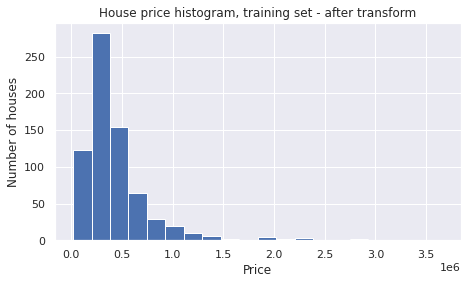

In [100]:
# Plot Price
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("House price histogram, training set - after transform")
ax1.set_xlabel('Price')
ax1.set_ylabel('Number of houses')
plt.hist(y_pred_full, bins=20)

In [101]:
write_kaggle_pred_data(pred=y_pred_full, filename="y_pred_full_BLR.csv", df=df_test_orig)

---
#### Piecewise BLR Model  

We'll run our Kaggle test data individually through the GMM to choose the cluster and then through the appropriate piecewise model to obtain the prediction while keeping track of the appropriate test data **Index**. Note that we're predicting the cluster just on the GMM features fitted, i.e. **Longitude** and **Latitude**.

In [102]:
# Predict test data cluster
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 114, 1: 118, 2: 362, 3: 108}

In [103]:
index_lst = df_test_orig.Index.values
print(f"index_lst:{type(index_lst)}")

index_lst:<class 'numpy.ndarray'>


In [104]:
# Select longitude & latitude features
ind=[4, 5]
X_ind = Xn_test[:,ind]
cluster_labels = gmm.predict(X_ind)

y_pred_0_BLR = blr(posterior0, yscaler0, Xn_test[cluster_labels==0])
y_pred_1_BLR = blr(posterior1, yscaler1, Xn_test[cluster_labels==1])
y_pred_2_BLR = blr(posterior2, yscaler2, Xn_test[cluster_labels==2])
y_pred_3_BLR = blr(posterior3, yscaler3, Xn_test[cluster_labels==3])



In [105]:
df_pred_piecewise = pd.DataFrame({'Index':df_test_orig['Index']})
df_pred_piecewise['Price'] = None

In [106]:
# Fill in the values in the appropriate rows
df_pred_piecewise.iloc[np.where(cluster_labels==0)[0], [1]] = y_pred_0_BLR.astype(int)
df_pred_piecewise.iloc[np.where(cluster_labels==1)[0], [1]] = y_pred_1_BLR.astype(int)
df_pred_piecewise.iloc[np.where(cluster_labels==2)[0], [1]] = y_pred_2_BLR.astype(int)
df_pred_piecewise.iloc[np.where(cluster_labels==3)[0], [1]] = y_pred_3_BLR.astype(int)

In [107]:
df_pred_piecewise.to_csv('y_pred_piecewise_BLR.csv', index=False)

In [108]:
df_pred_all = pd.DataFrame({'Index':df_test_orig['Index'], 'Price - Full':y_pred_full.astype(int), 'Price - Piecewise':df_pred_piecewise['Price']})
df_pred_all.head()

Index  Price - Full Price - Piecewise
0   1639        247106            287750
1   1640        443497            398518
2   1641        476435            381852
3   1642        888005            997430
4   1643        365105            351724

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

We'll use pretrained word embeddings with regression to predict house prices from the **description** field of our dataset.  
  
Text is a highly unstructured form of data with various types of noise present. For this reason we perform **Text Preprocessing** to clean it. We perform:  
- Noise removal  
  - Removal of stopwords, e.g. "is", "am", "the", etc.
- Lexicon normalization  
  - Stemming: stripping of suffixes such as "ing", "ly", etc.  
  - Lemmatization: use of vocabulary, word structure and grammar relations to obtain the root of the word.  
- Object Standardization  
  - Removal of words or phrases which are not in standard lexical dictionaries such as acronyms, hashtags and colloquial slang.

---
### Train Validation Dataset Split

We'll repeat splitting the training dataset into a training and validation dataset to allow us to determine what effect our choices have on the quality performance of the model. We still retain the previous data cleaning as this removed outliers.  

In [109]:
df_train = pd.read_csv(training_file)
df_train_prepd = house_price_data_feature_prep(df_train, exclude_outliers=True)
feature_set = ['Description']

X_train_prepd = df_train_prepd[feature_set]
y_train_prepd = df_train_prepd[['Price']]

X_train, X_val, y_train, y_val = train_test_split(X_train_prepd, y_train_prepd, test_size=0.2, random_state=42)

print(f"X_train shape:{X_train.shape}, X_val shape:{X_val.shape}, y_train shape:{y_train.shape}, y_val shape:{y_val.shape}")

X_train shape:(1307, 1), X_val shape:(327, 1), y_train shape:(1307, 1), y_val shape:(327, 1)


---
First we'll read in our corpus and remove stopwords. Then we'll view it.  
Given that the **Features** field, while very promising in it's definition, is not present in 64% of entries we will ignore it.    

In [110]:
X_train_prepd.Description

0       DNG are delighted to present to the market no....
1       13 Northbrook Terrace is a charming red brick ...
2       Welcome to No. 6 Cotter Close, an immaculately...
3       Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...
4       'Four Seasons' comes to the market as a wonder...
                              ...                        
1633    Built in c.1930 38 Stradbrook Road is a deligh...
1634    An impressive three-story family home superbly...
1635    DNG Lucan's leading estate agents are delighte...
1636    Holyrood Castle is a most distinctive 19th cen...
1637    A superb opportunity awaits to acquire this be...
Name: Description, Length: 1634, dtype: object

In [111]:
# Stop words are basically a set of commonly used words in any language
# https://en.wikipedia.org/wiki/Stop_word
# and are filtered out before processing of natural language data 
# Example list: https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')

def NLP_preprocess(text):
    """
    Normalization using NLTK and spaCy
    """
    # Remove numbers
    text_no_numbers = re.sub('[^a-zA-Z]', ' ', text)

    # Remove standalone letters (running multiple times as cannot find python equivalent of regex global)
    for i in range(10):
        text_no_numbers = re.sub('\s.\s', ' ', text_no_numbers)

    # Tokenization
    NLP_token = word_tokenize(text_no_numbers)
    
    # Lowercase
    NLP_lowercase = []
    for word in NLP_token:
        NLP_lowercase.append(word.lower())

    # Stemming
    PS = PorterStemmer()
    NLP_stem = []
    for word in NLP_lowercase:
        NLP_stem.append(PS.stem(word))

    # Lemmatization
    WL = WordNetLemmatizer()
    NLP_lemma = []
    for word in NLP_stem:
        NLP_lemma.append(WL.lemmatize(word))

    # Stopword   
    FS = []
    NLP_stop = set(stopwords.words("english"))
    for w in NLP_lemma:
        if w not in NLP_stop:  
            FS.append(w)
  
    # Punctuation  
    punctuations = "?:!.,;"
    for word in FS:
        if word in punctuations:
            FS.remove(word)
    
    return FS

[nltk_data] Downloading package punkt to /home/jim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:
preprocessed_text = NLP_preprocess(X_train.Description[0])
print(f"{'-'*10} Prior to Text Preprocessing:{'-'*10}\n{X_train.Description[0]}\n")
print(f"{'-'*10} Post Text Preprocessing:{'-'*10}\n{preprocessed_text}\n")

---------- Prior to Text Preprocessing:----------
DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. 

This well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.

Chipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.

Viewing comes highly r

Perform preprocessing for **Description** field of training dataset.

In [114]:
# Clean all description rows and add "clean" columm
X_train.Description_clean = X_train.Description.apply(lambda x : NLP_preprocess(x))
X_val.Description_clean = X_val.Description.apply(lambda x : NLP_preprocess(x))

In [115]:
# de-tokenization - joining the words and adding detokenized column
X_train.Description_detoken = X_train.Description_clean.apply(lambda x : ' '.join(x))
X_val.Description_detoken = X_val.Description_clean.apply(lambda x : ' '.join(x))

In [116]:
X_train.Description.shape

(1307,)

We'll view the dominant content of the descriptions through a word cloud.

In [117]:
def plot_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

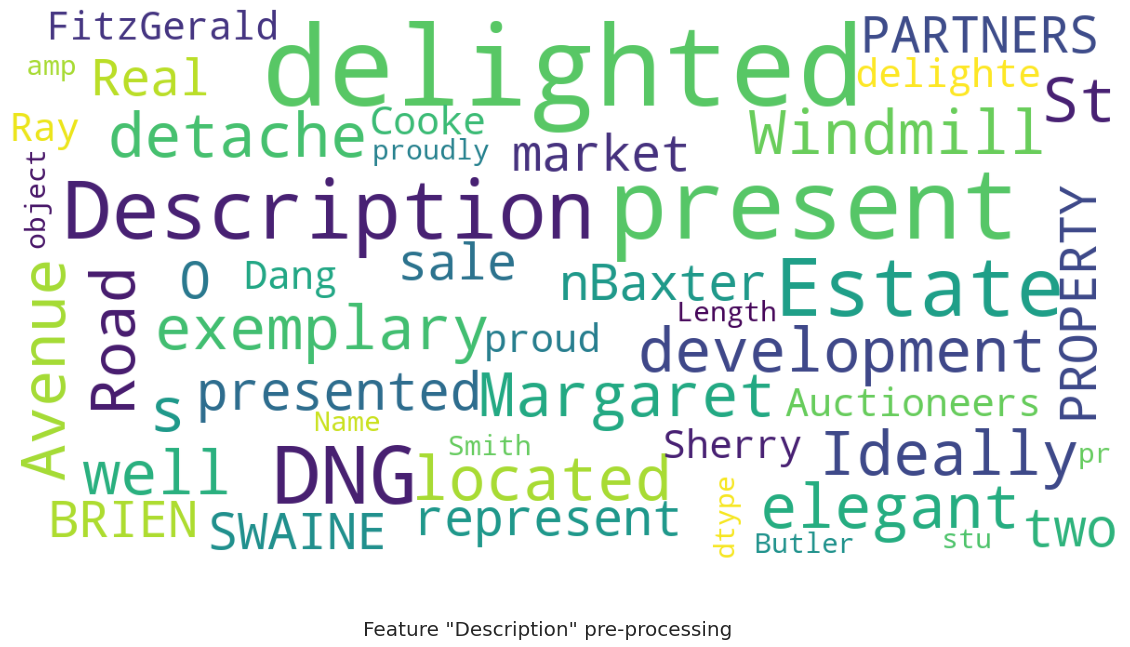

In [118]:
# print wordcloud
plot_wordcloud(X_train.Description, title='Feature "Description" pre-processing')

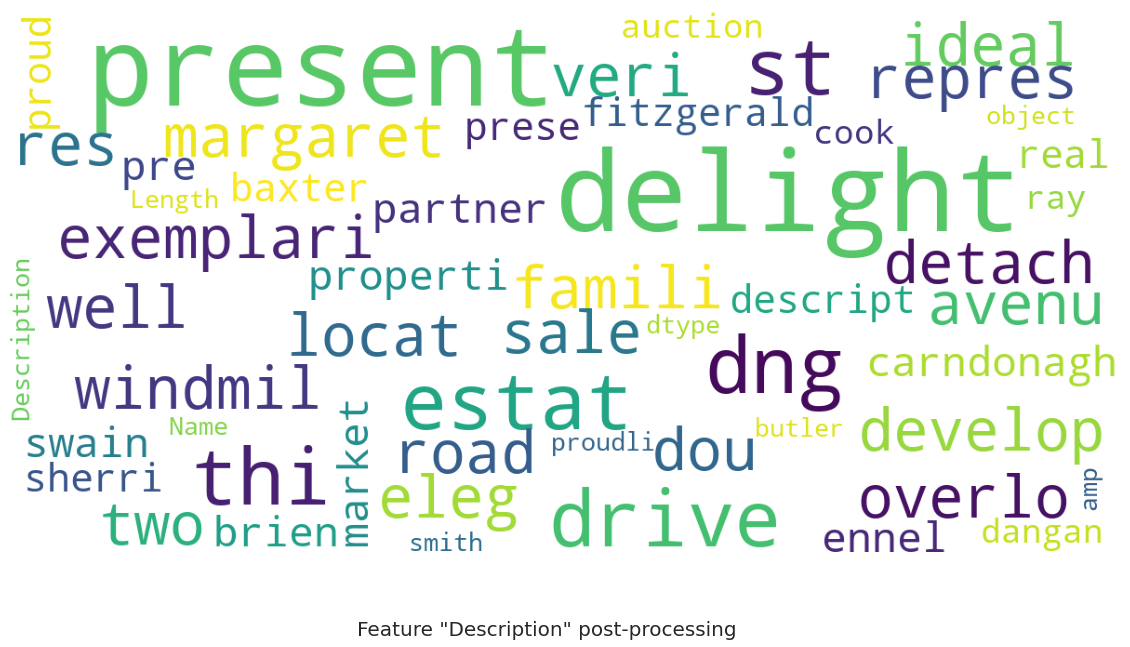

In [119]:
plot_wordcloud(X_train.Description_clean, title='Feature "Description" post-processing')

Initially this word cloud has presented the names of the estate agents as being prominant. We may later remove these if we are not benefitting from their inclusion.

We're going to use a pretrained embedding model to produce the embedding vector representation of our documents which are our **Description** feature. Models we consider are `word2vec` (Mikolov T., 2013) and `GloVe` (Pennington J. ).  
`word2vec` is produced and patented by Google and pretrained models are available which used datasets such as "Google News" containing about 100 billions words. This results in a model of size 1.6GB.  
`GloVe` is from Standford University and is available as pretrained models of varying sizes. We select `glove-wiki-gigaword-200` having been trained on a corpus consisting of Wikipedia 2014 and Gigaword 5 and available from Standford which results in 200 dimensional vector word embeddings (GloVe Standford). This has been trained on 6 billion tokens and 400,000 words. It is contained in a 662MB file `glove.6B.100d.txt`.     

In [120]:
# we need to convert from GloVe to word2vec file format to use with gensim
glove_input_file = 'data/glove/glove.6B.200d.txt'
word2vec_glove_file = 'data/glove/glove.6B.200d.txt.word2vec'

# if the file already exists then don't recreate it (time consuming!)
if not os.path.isfile(word2vec_glove_file):
    glove2word2vec(glove_input_file, word2vec_glove_file)

In [121]:
# we need to convert from GloVe to word2vec file format to use with gensim
glove_input_file = 'data/glove/glove.6B.50d.txt'
word2vec_glove_file_50d = 'data/glove/glove.6B.50d.txt.word2vec'

# if the file already exists then don't recreate it (time consuming!)
if not os.path.isfile(word2vec_glove_file_50d):
    glove2word2vec(glove_input_file, word2vec_glove_file_50d)

In [122]:
# Load the GloVe model
model = KeyedVectors.load_word2vec_format(word2vec_glove_file, binary=False)

word_embedding_dim = 200

In [123]:
print(f"Word vector dimension size:{model.vector_size}\nWord embedding of 'house':\n{model['house']}")

Word vector dimension size:200
Word embedding of 'house':
[ 4.7641e-01 -5.6269e-04  4.9202e-02 -7.3879e-01  3.7132e-02 -1.2158e-01
 -4.6408e-02  2.3389e-01  8.8552e-02  2.3504e-01  4.9984e-01 -2.5752e-02
  8.6279e-01 -5.6084e-01 -1.5898e-02  3.8606e-01 -4.0744e-01 -7.8242e-02
 -4.9744e-01  2.3597e-01 -2.5095e-01  2.5800e+00  2.3732e-01 -1.3906e-01
  3.2639e-01 -3.9747e-01 -7.6958e-02 -2.7866e-01  4.1035e-01  2.3829e-01
 -4.1175e-02 -6.7140e-01  4.4805e-01  1.9617e-01 -5.8027e-01  1.7948e-01
 -9.3515e-02 -3.6991e-01  8.2635e-01  1.7027e-01 -1.0140e-01  5.4630e-02
 -1.8867e-01  5.2122e-01 -1.5975e-01  1.3666e-01  5.4290e-01  1.9361e-01
 -9.2103e-02  5.6441e-01  1.4980e-02  1.5426e-01  4.4921e-01  2.5681e-01
 -3.7364e-02 -4.5421e-02  1.8183e-01 -1.2785e-01 -2.4702e-01  3.6216e-01
  5.0130e-01  2.7318e-01  1.0898e-01 -2.7041e-01  3.7572e-01 -7.0259e-01
 -9.0682e-01 -1.8616e-01 -4.0091e-02  4.0526e-01  3.8018e-01 -4.5428e-01
 -4.8367e-01  3.3373e-01  3.5684e-01  4.9874e-01 -7.3453e-01 -2.94

As a quick test we'll perform regression against the averaged word embeddings of the documents although we might have better performance by passing the documents through a CNN or similar.

In [124]:
def generate_document_vector(doc: list = None) -> np.ndarray:
    """Generate a document vector by taking the average of the word embeddings of the document.
    """
    doc_words_in_vocab = []
    doc_words_not_in_vocab = []
    sum_docs = np.zeros(shape=word_embedding_dim)
    for word in doc:
        try:
            # Check word exists (Gensim4.0)
            model.key_to_index[word]
        except:
            doc_words_not_in_vocab.append(word)
            pass
        else:
            doc_words_in_vocab.append(model[word])
            sum_docs += model[word]
   
    return sum_docs/word_embedding_dim, doc_words_not_in_vocab

In [125]:
docs_lst = []
excluded_words_lst = []
for doc in X_train.Description_clean:
    doc_vec, excluded_doc_words = generate_document_vector(doc)
    docs_lst.append(doc_vec)
    excluded_words_lst.append(excluded_doc_words)

X_train_docs = np.asarray(docs_lst)

In [126]:
print(f"X_train_docs.shape:{X_train_docs.shape}, y_train.shape:{y_train.shape}")

X_train_docs.shape:(1307, 200), y_train.shape:(1307, 1)


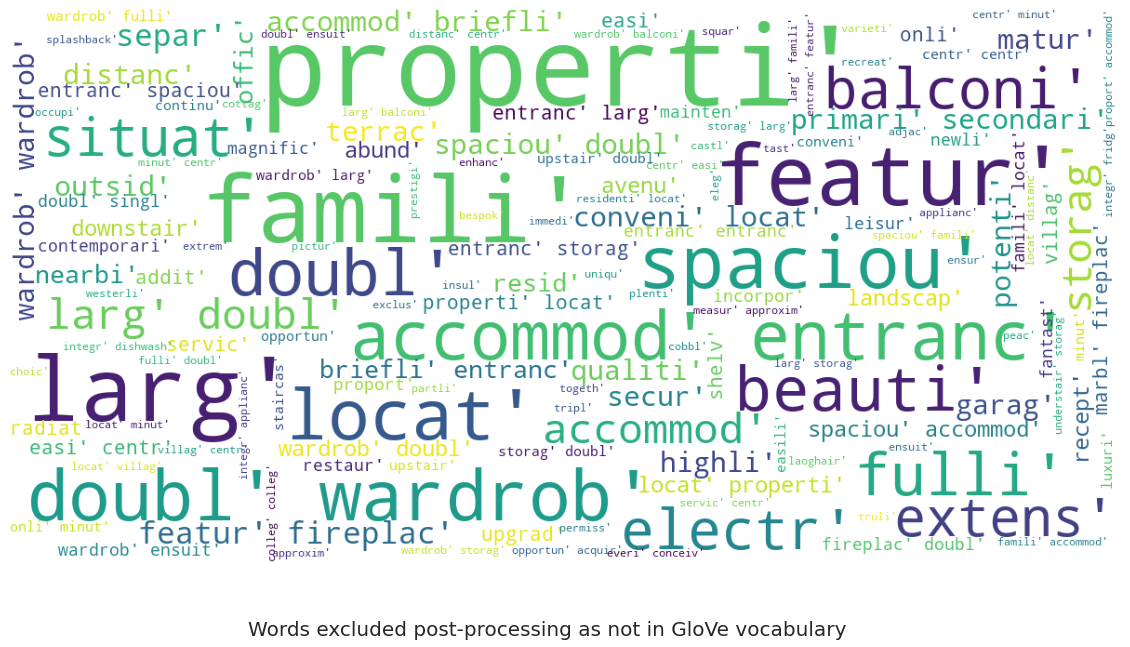

In [127]:
plot_wordcloud(excluded_words_lst, title='Words excluded post-processing as not in GloVe vocabulary')

We now have our training data represented as the averaged word embeddings per **Description**.
We will train against a linear regression with the **Price** as the response variable.

In [128]:
# Create linear regression object
linear_regr = linear_model.LinearRegression()
linear_regr.fit(X_train_docs, np.log(y_train.values))

LinearRegression()

In [129]:
docs_lst = []
excluded_words_lst = []
for doc in X_val.Description_clean:
    doc_vec, _ = generate_document_vector(doc)
    docs_lst.append(doc_vec)

X_val_docs = np.asarray(docs_lst)

In [130]:
# Make predictions using the validation set
y_val_pred = np.exp(linear_regr.predict(X_val_docs))

In [131]:
LR_mse_feature_Description = mean_squared_error(y_val.values, y_val_pred)
LR_mae_feature_Description = mean_absolute_error(y_val.values, y_val_pred)
LR_mape_feature_Description = mape(y_val_pred, y_val)
print(f"LinearRegresssion MSE score: {LR_mse_feature_Description}")
print(f"LinearRegresssion MAE score: {LR_mae_feature_Description}")
print(f"LinearRegresssion MAPE score: {LR_mape_feature_Description}")

LinearRegresssion MSE score: 197001836993006.12
LinearRegresssion MAE score: 1081624.0491912197
LinearRegresssion MAPE score: Price    0.719003
dtype: float64


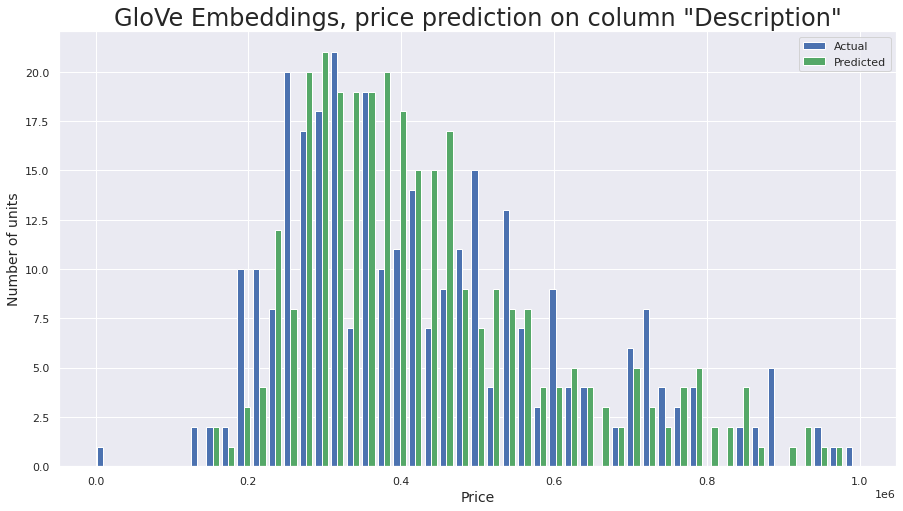

In [132]:
plt.style.use('seaborn-deep')

x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 2000)
bins = np.linspace(0, 1e6, 50)

plt.title('GloVe Embeddings, price prediction on column "Description"',fontsize=24)
plt.xlabel('Price',fontsize=14)
plt.ylabel('Number of units',fontsize=14)

plt.hist([y_val.values[:,0], y_val_pred[:,0]], bins, label=['Actual', 'Predicted'])
plt.legend(loc='upper right')
plt.show()

Using the **Description** feature is not showing itself to be useful when directly performing a regression on the averaged word embeddings. However when reviewing the text content of **Features** it can be seen that these are summarized versions of the **Description**. We will attempt to fit against these in place of **Description**.  

--- 
NLP using **Features** attribute.  

A quick check can see that our training data has a large number of `None` values within **Features**. We drop these in addition to our previous data cleaning.

In [133]:
df_train = pd.read_csv(training_file)

In [134]:
df_train.loc[df_train['Features'] == 'None']

Index        ID        Location  Num_Bathrooms  Num_Beds BER_class  \
0         1  12409116           Ongar              2         2        C3   
5         6  12225979       Glasnevin              1         3        E1   
8         9  12405966         Finglas              3         2       NaN   
9        10  12202195           Howth              2         2       NaN   
13       14  12374208           Howth              4         5       NaN   
...     ...       ...             ...            ...       ...       ...   
1627   1628  12380233      Clondalkin              2         2        D2   
1629   1630  12380579       Inchicore              1         3        D2   
1632   1633  12381830  Harold's Cross              1         1        D1   
1635   1636  12426975           Lucan              2         3        A3   
1636   1637  12198921      Sandymount              8         8        D2   

                                            Description Services Features  \
0     DNG are delighted to present to the market no....      NaN     None   
5     Property Team Lappin Estates take great pleasu...      NaN     None   
8     Ray Cooke Auctioneers are excited to present t...      NaN     None   
9     Needles Cottage is located on the southern slo...      NaN     None   
13    Enjoy relaxed seaside living with plenty of sp...      NaN     None   
...                                                 ...      ...      ...   
1627  RAY COOKE AUCTIONEERS are delighted to present...      NaN     None   
1629  PROPERTY PARTNERS O BRIEN SWAINE offer this 3 ...      NaN     None   
1632  PROPERTY PARTNERS OBRIEN SWAINE are proud to o...      NaN     None   
1635  DNG Lucan's leading estate agents are delighte...      NaN     None   
1636  Holyrood Castle is a most distinctive 19th cen...      NaN     None   

       Latitude  Longitude           Type  Surface    Price  
0     53.396659  -6.438791      apartment     67.0   195000  
5     53.380367  -6.279310       terraced    140.0   360000  
8     53.400071  -6.304156       terraced     72.0   229000  
9     53.366407  -6.077866  semi-detached     63.7   499500  
13    53.378695  -6.064997       detached    234.7  1098000  
...         ...        ...            ...      ...      ...  
1627  53.323626  -6.423100      apartment     70.6   159000  
1629  53.336934  -6.324606       terraced    106.0   325000  
1632  53.325479  -6.277781      apartment     37.0   220000  
1635  53.351667  -6.435278  semi-detached     98.0   340000  
1636  53.328997  -6.221030       detached    507.0  2500000  

[516 rows x 14 columns]

In [135]:
df_train_prepd = house_price_data_feature_prep(df_train, exclude_outliers=True)
df_train_prepd.drop(df_train_prepd.loc[df_train_prepd['Features']=='None'].index, inplace=True)

feature_set = ['Features']

X_train_prepd = df_train_prepd[feature_set]
y_train_prepd = df_train_prepd[['Price']]

X_train, X_val, y_train, y_val = train_test_split(X_train_prepd, y_train_prepd, test_size=0.2, random_state=42)

print(f"X_train shape:{X_train.shape}, X_val shape:{X_val.shape}, y_train shape:{y_train.shape}, y_val shape:{y_val.shape}")

X_train shape:(895, 1), X_val shape:(224, 1), y_train shape:(895, 1), y_val shape:(224, 1)


In [136]:
X_train.loc[X_train['Features']=='None']

Empty DataFrame
Columns: [Features]
Index: []

In [137]:
preprocessed_text = NLP_preprocess(X_train.iloc[0].Features)
print(f"{'-'*10} Prior to Text Preprocessing:{'-'*10}\n{X_train.iloc[0].Features}\n")
print(f"{'-'*10} Post Text Preprocessing:{'-'*10}\n{preprocessed_text}\n")

---------- Prior to Text Preprocessing:----------
Superb 3 bed Semi-detached house in excellent condition With large attic conversion.
Private front garden with ample parking
Master bedroom ensuite with built in wardrobes
Gas central heating with upgraded boiler
Excellent rear garden with paved patio and barna shed
Much sought after development &amp; close to all Local Amenities


---------- Post Text Preprocessing:----------
['superb', 'bed', 'semi', 'detach', 'hous', 'excel', 'condit', 'larg', 'attic', 'convers', 'privat', 'front', 'garden', 'ampl', 'park', 'master', 'bedroom', 'ensuit', 'built', 'wardrob', 'ga', 'central', 'heat', 'upgrad', 'boiler', 'excel', 'rear', 'garden', 'pave', 'patio', 'barna', 'shed', 'much', 'sought', 'develop', 'amp', 'close', 'local', 'amen']



In [138]:
# Clean all description rows and add "clean" columm
X_train.Features_clean = X_train.Features.apply(lambda x : NLP_preprocess(x))
X_val.Features_clean = X_val.Features.apply(lambda x : NLP_preprocess(x))

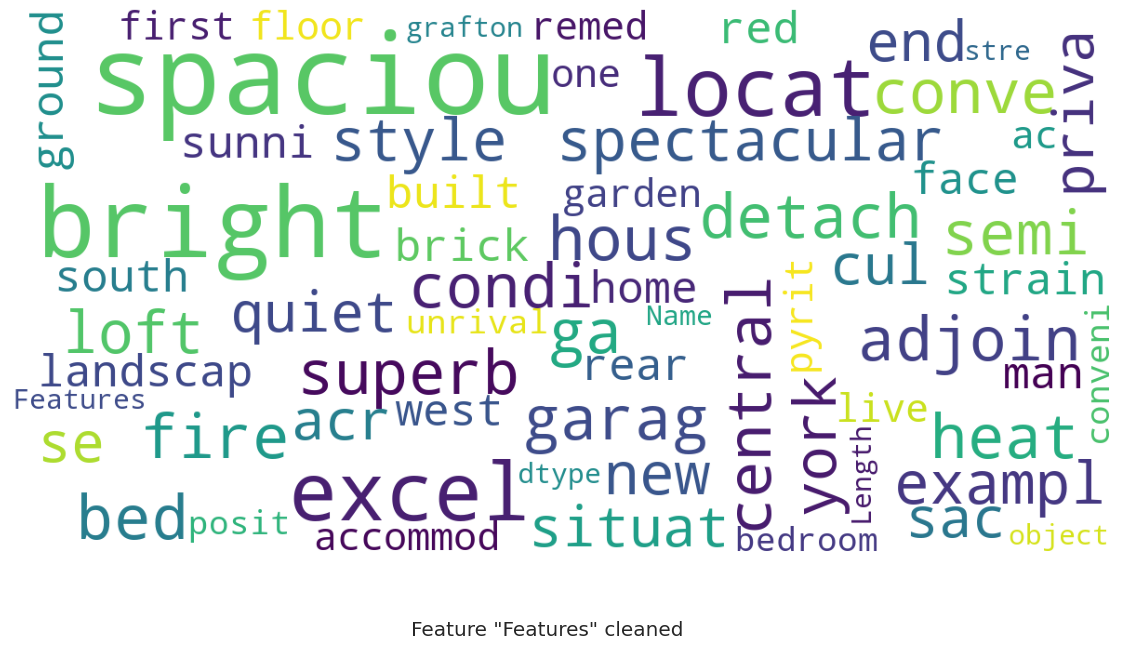

In [139]:
plot_wordcloud(X_train.Features_clean, title='Feature "Features" cleaned')

In [140]:
docs_lst = []
excluded_words_lst = []
for doc in X_train.Features_clean:
    doc_vec, excluded_doc_words = generate_document_vector(doc)
    docs_lst.append(doc_vec)
    excluded_words_lst.append(excluded_doc_words)

X_train_docs = np.asarray(docs_lst)

In [141]:
# Create linear regression object
linear_regr = linear_model.LinearRegression()
linear_regr.fit(X_train_docs, np.log(y_train.values))

LinearRegression()

In [142]:
docs_lst = []
excluded_words_lst = []
for doc in X_val.Features_clean:
    doc_vec, _ = generate_document_vector(doc)
    docs_lst.append(doc_vec)

X_val_docs = np.asarray(docs_lst)

In [143]:
# Make predictions using the validation set
y_val_pred = np.exp(linear_regr.predict(X_val_docs))

In [144]:
LR_mse_feature_Features = mean_squared_error(y_val.values, y_val_pred)
LR_mae_feature_Features = mean_absolute_error(y_val.values, y_val_pred)
LR_mape_feature_Features = mape(y_val_pred, y_val)
print(f"LinearRegresssion MSE score: {LR_mse_feature_Description}")
print(f"LinearRegresssion MAE score: {LR_mae_feature_Description}")
print(f"LinearRegresssion MAPE score: {LR_mape_feature_Features}")

LinearRegresssion MSE score: 197001836993006.12
LinearRegresssion MAE score: 1081624.0491912197
LinearRegresssion MAPE score: Price    0.426422
dtype: float64


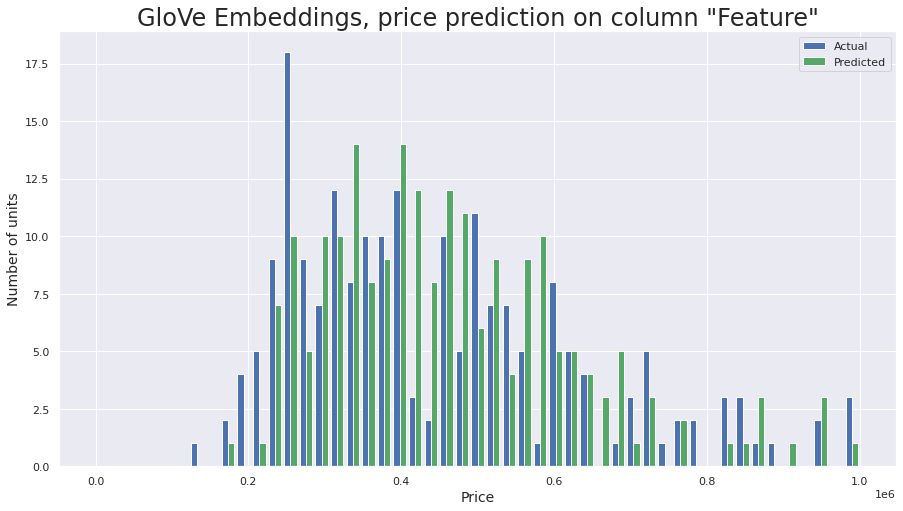

In [145]:
plt.style.use('seaborn-deep')

x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 2000)
bins = np.linspace(0, 1e6, 50)

plt.title('GloVe Embeddings, price prediction on column "Feature"',fontsize=24)
plt.xlabel('Price',fontsize=14)
plt.ylabel('Number of units',fontsize=14)

plt.hist([y_val.values[:,0], y_val_pred[:,0]], bins, label=['Actual', 'Predicted'])
plt.legend(loc='upper right')
plt.show()

In [146]:
print(f"LinearRegresssion MAPE score using feature Features: {LR_mape_feature_Features}")
print(f"LinearRegresssion MAPE score using feature Description: {LR_mape_feature_Description}")

LinearRegresssion MAPE score using feature Features: Price    0.426422
dtype: float64
LinearRegresssion MAPE score using feature Description: Price    0.719003
dtype: float64


Given the poor performance we will attempt to tune the **Description** feature by filtering words we believe to be domain specific to real estate. We'll do this through using the word-embedding ability to consider distance between words and provide a list of words which are related to real-estate from observing the content of **Description**.

---  

In [147]:
def filter_word_similar_to_list(check_word, similarity_list, distance) -> bool:
    """Filter word which is similar to words within list provided.
       Purpose is remove words which are not in domain.
    
    Args:
        word: word to be checked
        similarity_list: list of words to check against
        distance: GloVe distance we will allow as a similarity [0-1] with higher better
    Return:
        bool: True: word is similar, False: word is not similar
    """
    try:
        # Check word exists (Gensim4.0)
        model.key_to_index[check_word]
    except:
        return False  # Early exit!!
        pass
    else:    
        similar = False
        for word in similarity_list:
            if model.similarity(word, check_word) > distance:
                similar = True
                break
        return similar

In [148]:
df_train = pd.read_csv(training_file)
df_train_prepd = house_price_data_feature_prep(df_train, exclude_outliers=True)
feature_set = ['Description']

X_train_prepd = df_train_prepd[feature_set]
y_train_prepd = df_train_prepd[['Price']]

X_train, X_val, y_train, y_val = train_test_split(X_train_prepd, y_train_prepd, test_size=0.2, random_state=42)

print(f"X_train shape:{X_train.shape}, X_val shape:{X_val.shape}, y_train shape:{y_train.shape}, y_val shape:{y_val.shape}")

X_train shape:(1307, 1), X_val shape:(327, 1), y_train shape:(1307, 1), y_val shape:(327, 1)


In [149]:
# Clean all description rows and add "clean" columm
X_train.Description_clean = X_train.Description.apply(lambda x : NLP_preprocess(x))
X_val.Description_clean = X_val.Description.apply(lambda x : NLP_preprocess(x))

In [150]:
X_train.Description_clean

63      [ideal, locat, thi, exemplari, develop, overlo...
815     [st, margaret, road, eleg, detach, famili, res...
1390    [windmil, avenu, veri, well, present, two, dou...
1631    [dng, delight, repres, sale, carndonagh, drive...
1327    [properti, partner, brien, swain, delight, pre...
                              ...                        
1133    [dng, delight, present, market, ennel, drive, ...
1297    [descript, baxter, real, estat, delight, prese...
862     [sherri, fitzgerald, proud, present, dangan, a...
1463    [ray, cook, auction, proudli, present, thi, st...
1129    [smith, amp, butler, estat, delight, present, ...
Name: Description, Length: 1307, dtype: object

In [151]:
# Domain specific word list

"""
experimental lists:

- MAPE: 0.39
  similarity_list = ['garden', 'parking', 'school', 'near', 'light', 'transport', 'quiet', 'shops',
                     'sea', 'park', 'estate', 'parquet', 'overlook']
  distance = 0.4

- MAPE: 0.388
  similarity_list = ['garden', 'parking', 'school', 'near', 'transport', 'quiet', 'shops',
                     'sea', 'park', 'estate', 'parquet', 'overlook']
  distance = 0.3

- MAPE: 0.385
  similarity_list = ['garden', 'parking', 'school', 'near', 'transport', 'quiet', 'shops',
                     'sea', 'park', 'estate', 'overlook']
  distance = 0.3

- MAPE: 0.378
  similarity_list = ['garden', 'parking', 'school', 'near', 'transport', 'quiet', 'shops',
                     'sea', 'park', 'estate', 'overlook', 'south', 'north', 'east', 'west']
  distance = 0.3
"""

similarity_list = ['garden', 'parking', 'school', 'near', 'transport', 'quiet', 'shops',
                   'sea', 'park', 'estate', 'overlook', 'south', 'north', 'east', 'west']
distance = 0.3

In [152]:
filtered_docs = []
for doc in X_train.Description_clean:
    filtered_doc = []
    for word in doc:
        if filter_word_similar_to_list(word, similarity_list=similarity_list, distance=distance) == True:
            filtered_doc.append(word)
    filtered_docs.append(filtered_doc)

In [153]:
X_train_filtered = pd.DataFrame({'Description_filtered':filtered_docs})

In [154]:
X_train_filtered.head(4)

Description_filtered
0  [ideal, develop, overlook, park, river, one, b...
1  [st, margaret, road, road, within, walk, shop,...
2  [well, present, two, bedroom, rear, within, qu...
3  [delight, sale, drive, five, bedroom, semi, ho...

In [155]:
X_train_filtered.to_csv('x_train_filtered.csv')

In [156]:
X_train.Description_clean.to_csv('x_train_clean.csv')

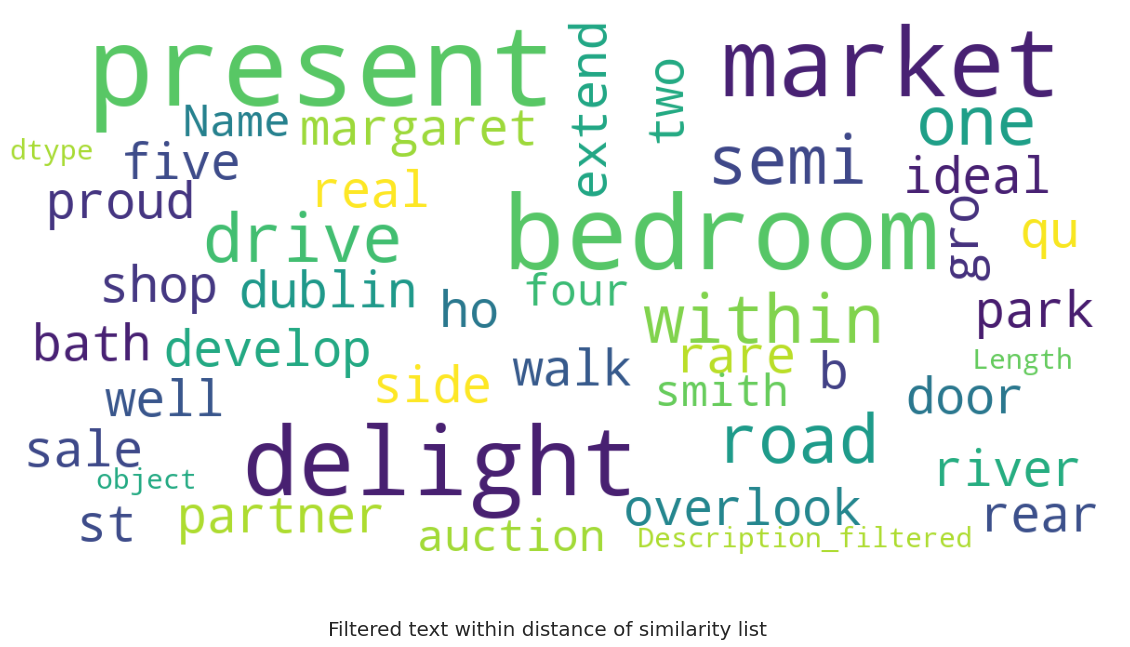

In [157]:
plot_wordcloud(X_train_filtered.Description_filtered, title='Filtered text within distance of similarity list')

In [158]:
docs_lst = []
excluded_words_lst = []
for doc in X_train_filtered.Description_filtered:
    doc_vec, excluded_doc_words = generate_document_vector(doc)
    docs_lst.append(doc_vec)
    excluded_words_lst.append(excluded_doc_words)

X_train_docs = np.asarray(docs_lst)

In [159]:
# Create linear regression object
linear_regr = linear_model.LinearRegression()
linear_regr.fit(X_train_docs, np.log(y_train.values))

LinearRegression()

In [160]:
# Filter validation set docs as per training set
filtered_docs = []
for doc in X_val.Description_clean:
    filtered_doc = []
    for word in doc:
        if filter_word_similar_to_list(word, similarity_list=similarity_list, distance=distance) == True:
            filtered_doc.append(word)
    filtered_docs.append(filtered_doc)

In [161]:
docs_lst = []
for doc in filtered_docs:
    doc_vec, _ = generate_document_vector(doc)
    docs_lst.append(doc_vec)

X_val_docs = np.asarray(docs_lst)

In [162]:
# Make predictions using the validation set
y_val_pred = np.exp(linear_regr.predict(X_val_docs))

In [163]:
print(f"y_val_pred.max():{y_val_pred.max()}, y_val_pred.min():{y_val_pred.min()}")

y_val_pred.max():9250883.53612267, y_val_pred.min():183369.47568456893


In [164]:
LR_mse_feature_Features = mean_squared_error(y_val.values, y_val_pred)
LR_mae_feature_Features = mean_absolute_error(y_val.values, y_val_pred)
LR_mape_feature_Features = mape(y_val_pred, y_val)
print(f"LinearRegresssion MSE score: {LR_mse_feature_Description}")
print(f"LinearRegresssion MAE score: {LR_mae_feature_Description}")
print(f"LinearRegresssion MAPE score: {LR_mape_feature_Features}")

LinearRegresssion MSE score: 197001836993006.12
LinearRegresssion MAE score: 1081624.0491912197
LinearRegresssion MAPE score: Price    0.378464
dtype: float64


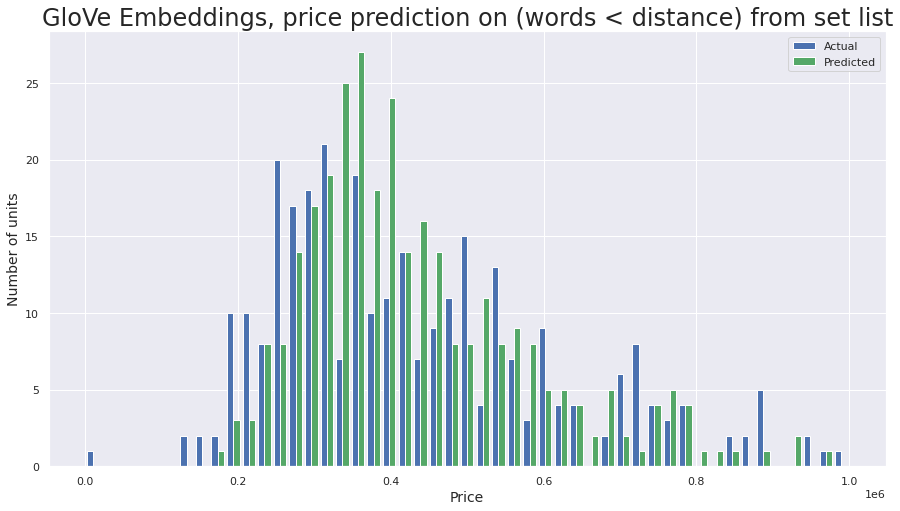

In [165]:
plt.style.use('seaborn-deep')

x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 2000)
bins = np.linspace(0, 1e6, 50)

plt.title('GloVe Embeddings, price prediction on (words < distance) from set list',fontsize=24)
plt.xlabel('Price',fontsize=14)
plt.ylabel('Number of units',fontsize=14)

plt.hist([y_val.values[:,0], y_val_pred[:,0]], bins, label=['Actual', 'Predicted'])
plt.legend(loc='upper right')
plt.show()

We'll add the word-embedding into the earlier Dataframe and determine it's relative importance using XGBoost.

In [188]:
# We'll go back to the original training set and prep it as before, this time adding 'Description'
df_train = pd.read_csv(training_file)
df_train_prepd = house_price_data_feature_prep(df_train, exclude_outliers=True)

feature_set = ['Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Longitude', 'Latitude', 'Description', 'Price']

X_train_prepd = df_train_prepd[feature_set]
y_train_prepd = df_train_prepd[['Price']]

print(f"X_train prepd shape:{X_train_prepd.shape},y_train prepd shape:{y_train_prepd.shape}")

X_train prepd shape:(1634, 8),y_train prepd shape:(1634, 1)


In [189]:
def add_doc_embedding(df:pd.DataFrame, similarity_list, distance) -> pd.DataFrame:
    """Generate the filtered doc embeddings for a dataframe.
    
    Note: Assumes the dataframe has previously been cleaned and will contain 'Description_clean'
    
    Args:
        df: dataframe to operate on
        similarity_list: list of words to compare distance to
        distance: distance to compare words for similarity
    Return:
        numpy array of filtered doc embeddings
    """

    # Add our word-embedding for the feature Description on full feature set
    df.Description_clean = df.Description.apply(lambda x : NLP_preprocess(x))

    filtered_docs = []
    for doc in df.Description_clean:
        filtered_doc = []
        for word in doc:
            if filter_word_similar_to_list(word, similarity_list=similarity_list, distance=distance) == True:
                filtered_doc.append(word)
        filtered_docs.append(filtered_doc)

    df.Description_clean = df.Description.apply(lambda x : NLP_preprocess(x))

    filtered_docs = []
    for doc in df.Description_clean:
        filtered_doc = []
        for word in doc:
            if filter_word_similar_to_list(word, similarity_list=similarity_list, distance=distance) == True:
                filtered_doc.append(word)
        filtered_docs.append(filtered_doc)

    docs_lst = []
    for doc in filtered_docs:
        doc_vec, _ = generate_document_vector(doc)
        docs_lst.append(doc_vec)

    return np.asarray(docs_lst)

In [190]:
X_train_docs = add_doc_embedding(df=X_train_prepd, similarity_list=similarity_list, distance=distance)

In [191]:
X_train_docs

array([[ 0.12517169, -0.00568102, -0.00043683, ...,  0.08295618,
        -0.1165784 ,  0.07229956],
       [ 0.21339748, -0.05426726, -0.02433037, ...,  0.13872047,
        -0.10269129,  0.10785735],
       [ 0.23135117, -0.06051566, -0.09662575, ...,  0.20775446,
        -0.1698774 ,  0.1741444 ],
       ...,
       [ 0.38643208, -0.14786267, -0.1072837 , ...,  0.2052381 ,
        -0.39544029,  0.20514822],
       [ 0.40647284, -0.17417174, -0.09748635, ...,  0.30832358,
        -0.36764766,  0.20204187],
       [ 0.08097538,  0.00280852, -0.05032504, ...,  0.06865865,
        -0.10564978,  0.07810468]])

In [192]:
X_train_prepd.head(2)

Surface  Num_Beds  Num_Bathrooms  Type_detached  Longitude   Latitude  \
0  4.168214  0.693147       0.693147              0  -6.438791  53.396659   
1  4.538710  0.693147       0.000000              0  -6.239779  53.357129   

                                         Description   Price  
0  DNG are delighted to present to the market no....  195000  
1  13 Northbrook Terrace is a charming red brick ...  425000

We will reduce the dimensionality of the 200-D embeddings to something that we can review against other features and train upon.

In [193]:
X_train_docs_reduced = X_train_docs
REDUCTION_DIM = 15

# Dimensionality reduction on the 200-D word embedding to allow a form of comparison against other features
#  PCA version: pca = PCA(n_components=REDUCTION_DIM, random_state=10)
svd = TruncatedSVD(n_components=REDUCTION_DIM, n_iter=7, random_state=42)
reduced_doc_embedding = svd.fit_transform(X_train_docs_reduced)

In [194]:
print(f"Initial document embedding shape:{X_train_docs_reduced.shape}")
print(f"SVD dimensionality reduced document embedding shape:{reduced_doc_embedding.shape}")

Initial document embedding shape:(1634, 200)
SVD dimensionality reduced document embedding shape:(1634, 15)


In [195]:
reduced_doc_embedding[0]

array([ 1.64307672,  0.03614113, -0.1145338 , -0.16003264, -0.00208185,
       -0.09590281,  0.03595904,  0.05360281,  0.042871  , -0.03415499,
       -0.00592288, -0.0516479 , -0.00754932,  0.03689668,  0.06071959])

In [196]:
doc_embed_columns = [f"doc_em_{x}" for x in range(REDUCTION_DIM)]

In [197]:
# Insert dimensionality reduced document embedding into dataframe with each dimension as a feature column
pd_doc_embed_columns = pd.DataFrame(reduced_doc_embedding, columns=doc_embed_columns)

In [198]:
X_train_prepd[doc_embed_columns] = pd_doc_embed_columns[doc_embed_columns]

In [199]:
X_train_prepd.head(2)

Surface  Num_Beds  Num_Bathrooms  Type_detached  Longitude   Latitude  \
0  4.168214  0.693147       0.693147              0  -6.438791  53.396659   
1  4.538710  0.693147       0.000000              0  -6.239779  53.357129   

                                         Description   Price  doc_em_0  \
0  DNG are delighted to present to the market no....  195000  1.643077   
1  13 Northbrook Terrace is a charming red brick ...  425000  2.090342   

   doc_em_1  ...  doc_em_5  doc_em_6  doc_em_7  doc_em_8  doc_em_9  doc_em_10  \
0  0.036141  ... -0.095903  0.035959  0.053603  0.042871 -0.034155  -0.005923   
1  0.157752  ...  0.134747 -0.050781 -0.050848  0.019975 -0.062601  -0.081181   

   doc_em_11  doc_em_12  doc_em_13  doc_em_14  
0  -0.051648  -0.007549   0.036897   0.060720  
1  -0.025510  -0.021213   0.008815  -0.052493  

[2 rows x 23 columns]

<AxesSubplot:>

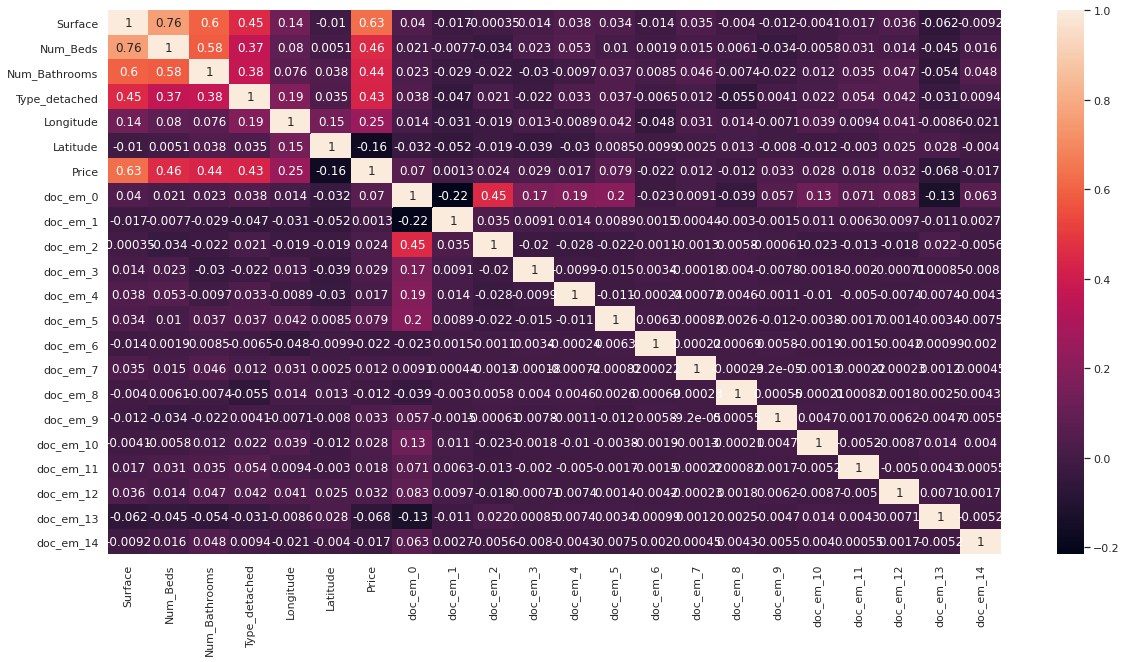

In [200]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(X_train_prepd.corr(), annot = True)

In [201]:
X_train_cpy = X_train_prepd.copy()
X_train_prepd.drop(['Price', 'Description'], axis=1, inplace=True)

[20:01:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


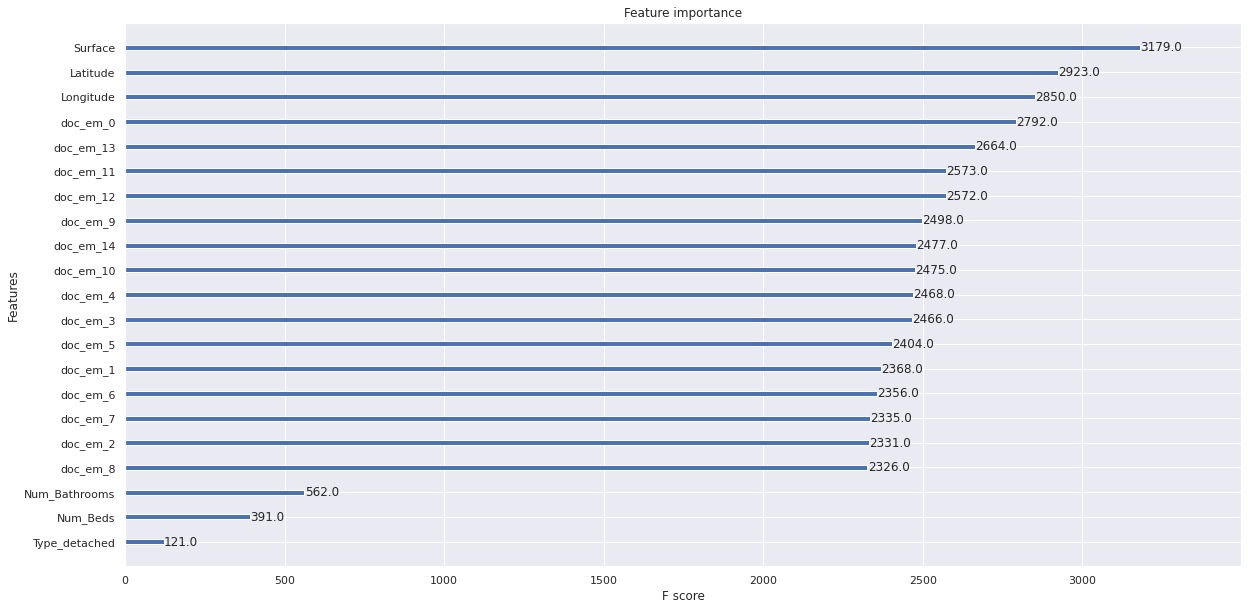

In [202]:
xgb = XGBClassifier()
xgb.fit(X_train_prepd, y_train_prepd)
# plot feature importance
plt.rcParams["figure.figsize"] = (20, 10)
plot_importance(xgb)
plt.show()

---

Train the full network using the document embeddings drived from a set of words with similarity to a hand crafted "real estate" word set using GloVe embeddings.  

In [203]:
X_train_prepd.shape

(1634, 21)

In [204]:
X_train_ = X_train_prepd.values
y_train_ = y_train_prepd.values

In [205]:
X_train_ = X_train_[:X_train.shape[0]-4,] # BUG - dropping last 4 lines

In [206]:
y_train_ = y_train_[:y_train.shape[0]-4,]

Finished [100%]: Average Loss = 1,279.2


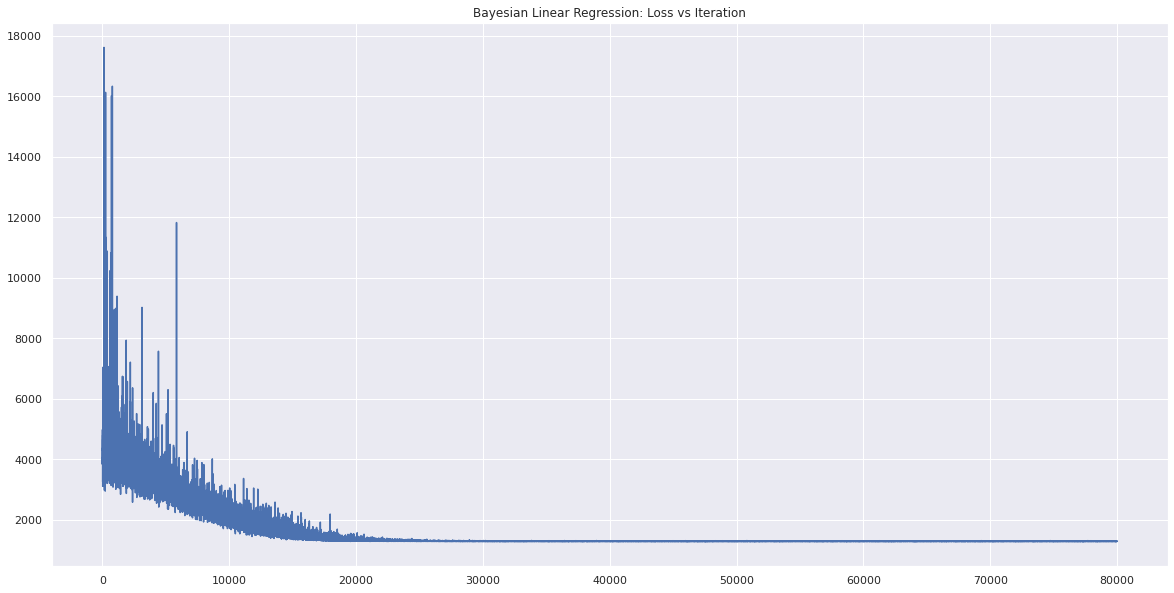

In [207]:
# Train single BLR model

# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([X_train_, X_train_[:,[0]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

ylog = np.log(y_train_.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

posterior, approximation = generate_bayesian_lin_reg_model(X=Xn_train, y=yn_train,
                                                           iteration_cnt=80000, sample_cnt=5000)
# check the convergence
plt.title('Bayesian Linear Regression: Loss vs Iteration')
plt.plot(approximation.hist);

---

### Predict on test data.

In [234]:
df_test = pd.read_csv(testing_file)
df_test_orig = df_test.copy()
df_test.head(2)

Index        ID   Location  Num_Bathrooms  Num_Beds BER_class  \
0   1639  12292473   Milltown              2         2        C2   
1   1640  12314667  Glasnevin              2         5        E1   

                                         Description  \
0  OMD Estate Agents are delighted to present thi...   
1  Welcome to Saint Anthony No.214 Glasnevin Aven...   

                            Services  \
0  Parking,Oil Fired Central Heating   
1  Parking,Gas Fired Central Heating   

                                            Features   Latitude  Longitude  \
0  Designated parking spaces\nPresented in pristi...  53.316269  -6.243391   
1  Modern Worcester Gas Boiler\nSingle Glazed Win...  53.390769  -6.281936   

            Type  Surface  
0      townhouse     65.0  
1  semi-detached    142.0

In [225]:
try:
    feature_set.remove('Price')
except:
    pass

In [226]:
# Don't exclude outliers of our test dataset as we will need to predict on everything
df_test_prepd = house_price_data_feature_prep(df_test, exclude_outliers=False)
X_test_prepd = df_test_prepd[feature_set]

In [227]:
# Test on test dataset
X_test_docs = add_doc_embedding(df=X_test_prepd, similarity_list=similarity_list, distance=distance)
# Reduce dimension
reduced_doc_embedding = svd.transform(X_test_docs)
# Insert into dataframe
pd_doc_embed_columns = pd.DataFrame(reduced_doc_embedding, columns=doc_embed_columns)
X_test_prepd[doc_embed_columns] = pd_doc_embed_columns[doc_embed_columns]

In [228]:
X_test_prepd.head(2)

Surface  Num_Beds  Num_Bathrooms  Type_detached  Longitude   Latitude  \
0  3.523415  0.693147       0.693147              0  -6.243391  53.316269   
1  4.708629  1.609438       0.693147              0  -6.281936  53.390769   

                                         Description  doc_em_0  doc_em_1  \
0  OMD Estate Agents are delighted to present thi...  0.719422 -0.024427   
1  Welcome to Saint Anthony No.214 Glasnevin Aven...  2.153040  0.250244   

   doc_em_2  ...  doc_em_5  doc_em_6  doc_em_7  doc_em_8  doc_em_9  doc_em_10  \
0 -0.070426  ...  0.044682 -0.037184  0.013194 -0.013913 -0.011320   0.017903   
1 -0.101490  ...  0.067933 -0.062475  0.034626 -0.092847  0.002975  -0.016091   

   doc_em_11  doc_em_12  doc_em_13  doc_em_14  
0  -0.006147  -0.022499  -0.022707   0.041272  
1   0.024447  -0.017592   0.071823   0.028823  

[2 rows x 22 columns]

In [230]:
try:
    X_test_prepd.drop(['Description'], axis=1, inplace=True)
except:
    pass

In [231]:
X_test_ = X_test_prepd.values

Xss_test = np.hstack([X_test_, X_test_[:,[0]]**2])
Xn_test = xscaler.transform(Xss_test)

In [232]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_test_pred = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

In [235]:
write_kaggle_pred_data(pred=y_pred_full, filename="y_pred_full_BLR_incld_NLP.csv", df=df_test_orig)

### NLP Summary

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Bayesian Neural Networks (BNNs) are a combination of probabilistic models and neural networks. Bayes Rule is the basis for BNNs and is defined as follows;

$Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{Pr(y)}$ where,

$Pr(\theta|y) = $ Posterior Probability

$Pr(y|\theta) = $ Likelihood of observations

$Pr(\theta) = $ Prior Probability

$Pr(y) = $ Normalising Constant

In establishing the posterior probability various methods can be used, including the Metropolis Hastings and Hamiltonian Monte Carlo Algorithms. 

The Metropolis Hastings Algorithm uses a Markov Chain of states. These states are correlated and therefore lead to samples that are from the desired posterior distribution. This is more efficient than randomly taking points from a sample space. A sample $\theta$ candidate is generated from a parameter space $q$ must meet the following acceptance rule.

$\alpha = \min\left(1, \displaystyle\frac{\pi(\theta_c)q(\theta_0|\theta_c)}{\pi(\theta_c)q(\theta_c|\theta_0)}\right)$

The next state is chosen with probability $\alpha$ or else the next state is $\theta_0$

The Hamiltonian Monte Carlo Algorithm (HMC) converges more efficiently than the Metropolis Hasting Algorithm by leveraging the geometric properties of a dataset. The parameters of the HMC are step size $(\epsilon)$ and number of steps $(L)$ and a standard multivariate Gaussian $(r)$. A parameter pair value $(\displaystyle\tilde{\theta}, \tilde{r})$ are generated to be used in the HMC acceptance model, which is as follows;

$\alpha = \min\left(1, \frac{\exp(L(\tilde{\theta})-\frac{1}{2}\tilde{r}\cdot\tilde{r})}{\exp(L(\theta^{m-1})-\frac{1}{2}r^0\cdot r^0)}\right)$

Other more in dept and complex sampling algorithms have been developed such as No-U-Turn Sampler and Variational Inference Methods Automatic Differentiation Variational Inference. These are a critical element to the probabilistic model element of BNNs (Mullachery, et al., 2018).

BNNs use the prior to identify the key parameters, these are input into the neural network. The output of the neural network is used to calculate the likelihood with a specifically defined probability function. Following this a sample of the variational interface is used to calculate the posterior distribution. A BNN therefore is a probabilistic estimator that employs neural networks as function approximators (Izmailov, et al., 2021) (Charnock, et al., 2020).



In [236]:
# Instantiate Kernel
kernel = GPy.kern.RBF(input_dim=1,lengthscale=0.15,variance=0.2)
print(kernel)

  rbf.         |  value  |  constraints  |  priors
  variance     |    0.2  |      +ve      |        
  lengthscale  |   0.15  |      +ve      |        


In [242]:
df_train = pd.read_csv(training_file)

In [243]:
for col in df_train.columns:
    print(col)

Index
ID
Location
Num_Bathrooms
Num_Beds
BER_class
Description
Services
Features
Latitude
Longitude
Type
Surface
Price


In [244]:
# List of key features determined from EDA and XGBoost Feature Importance Analysis

featrain = ['Num_Bathrooms', 'Num_Beds', 'BER_class','Latitude', 'Longitude', 'Surface', 'Price']
featest = ['Num_Bathrooms', 'Num_Beds', 'BER_class','Latitude', 'Longitude', 'Surface']

df_subset_train = df_train[featrain]
df_subset_test = df_test[featest]

In [245]:
df_subset_train

Num_Bathrooms  Num_Beds BER_class   Latitude  Longitude  Surface  \
0                 2         2        C3  53.396659  -6.438791    67.00   
1                 1         2        D1  53.357129  -6.239779    95.97   
2                 3         3        A3  53.266468  -6.222771   107.00   
3                 1         3        E1  53.261600  -6.166738    81.00   
4                 3         4        D1  53.550731  -6.121415   153.00   
...             ...       ...       ...        ...        ...      ...   
1633              1         2        C2  53.292767  -6.166668    64.00   
1634              3         5        C1  53.284975  -6.178685   175.96   
1635              2         3        A3  53.351667  -6.435278    98.00   
1636              8         8        D2  53.328997  -6.221030   507.00   
1637              2         2        E1  53.231438  -6.125022    50.00   

        Price  
0      195000  
1      425000  
2      535000  
3      499000  
4      510000  
...       ...  
1633   500000  
1634   795000  
1635   340000  
1636  2500000  
1637   370000  

[1638 rows x 7 columns]

In [246]:
df_subset_test

Num_Bathrooms  Num_Beds BER_class   Latitude  Longitude  Surface
0                2         2        C2  53.316269  -6.243391     65.0
1                2         5        E1  53.390769  -6.281936    142.0
2                1         2         G  53.272486  -6.108675     80.0
3                4         4        A2  53.376932  -6.185334    209.0
4                2         3         F  53.327208  -6.308938    108.0
..             ...       ...       ...        ...        ...      ...
697              1         1         G  53.343377  -6.296654     40.0
698              1         2        D2  53.351074  -6.285557     57.0
699              1         3        D1  53.261710  -6.164979     93.0
700              2         3       NaN  53.360515  -6.189661    118.0
701              1         3         F  53.280408  -6.132925    122.0

[702 rows x 6 columns]

In [247]:
# Separate training data into target 'y' and predictor 'X' values

# train set, input columns
X_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
y_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
X_test = df_subset_test.iloc[:,0:].values 

In [248]:
# Scale y_train 'price' values

ylog = np.log(y_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
y_train = yscaler.transform(ylog)



In [249]:
y_train.shape

(1638, 1)

In [250]:
y_train

array([[-1.37536205],
       [-0.06935891],
       [ 0.31649226],
       ...,
       [-0.44341881],
       [ 2.90100696],
       [-0.30167361]])

In [251]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

Specifically, PyMC3 supports the following Variational Inference (VI) methods:

  * Automatic Differentiation Variational Inference (ADVI): 'advi'
  * ADVI full rank: 'fullrank_advi'
  * Stein Variational Gradient Descent (SVGD): 'svgd'
  * Amortized Stein Variational Gradient Descent (ASVGD): 'asvgd'
  * Normalizing Flow with default scale-loc flow (NFVI): 'nfvi'


In [252]:
# some parameters
par1 = 25  # start with 100, then use 1000+
par2 = 250 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

Only 25 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 250 tune and 25 draw iterations (250 + 25 draws total) took 98 seconds.
The acceptance probability does not match the target. It is 0.9674654676395327, but should be close to 0.8. Try to increase the number of tuning steps.


In [253]:
# we can do instead an approximated inference
param3 = 80000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.0008    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 1,056.8


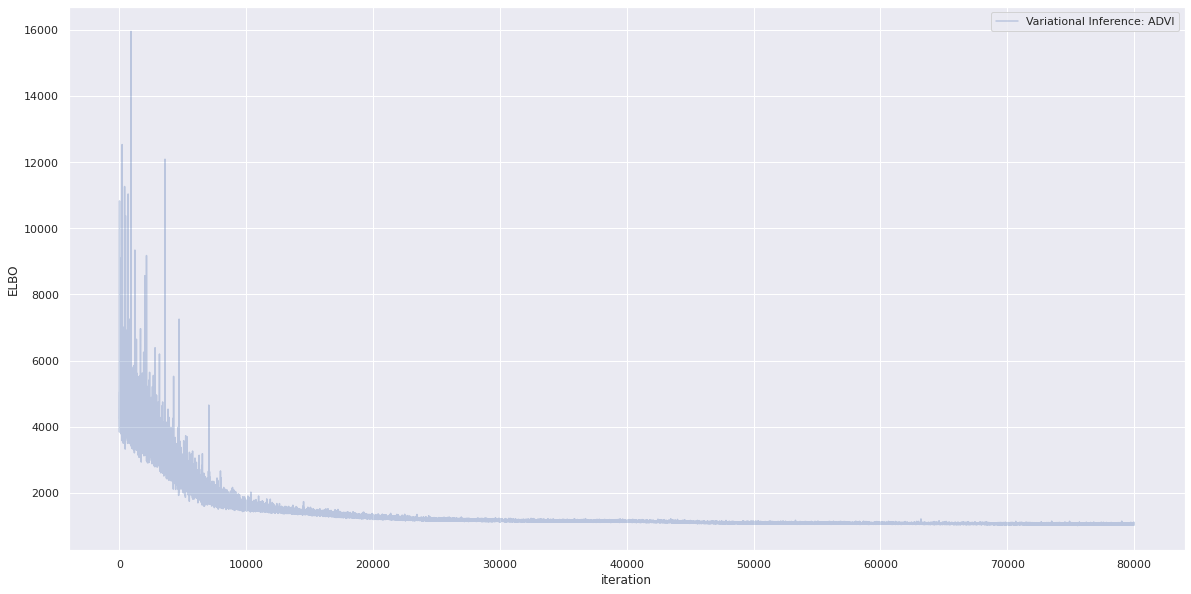

In [254]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [255]:
# draw samples from variational posterior
D = 702
posterior = approx.sample(draws=D)

### Evaluate model on validation data set

In [256]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((X_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred)

In [257]:
# prediction
y_test_nn = np.exp(yscaler.inverse_transform(y_pred))[:,0]


In [258]:
y_test_nn.shape

(702,)

In [259]:
df_test_orig.shape

(702, 13)

In [260]:
write_kaggle_pred_data(pred=y_test_nn, filename="y_pred_BNN.csv", df=df_test_orig)


Your comments, explanation, and references here.

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

# SUMMARY

Your summary here.

# References

Bansal S. (2017), Analytics Vidhya, Ultimate Guide to Understand and Implement Natural Language Processing, available at:
https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/?utm_source=blog&utm_medium=top_5_sentence_embedding Accessed 11/Oct/21

Joshi Y. (2020), Analytics Vidhya, Steps for effective text data cleaning, available at: https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/ Accessed 11/Oct/21

Bansai S. (2014), Analytics Vidhya, A Quick Guide to Text Cleaning Using the nltk Library, available at: https://www.analyticsvidhya.com/blog/2020/11/text-cleaning-nltk-library/, Accessed 11/Oct/21

Chambliss C. (2019), TowardsDataScience, Using word2vec to Analyze News Headlines and Predict Article Success, https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751, Accessed 11/Oct/21

Mikolov T. (2013) Efficient Estimation of Word Representations in Vector Space

Pennington J. (), GloVe: Global Vectors for Word Representation  

GloVe Standford pretrained word vectors: https://nlp.stanford.edu/projects/glove/

Brownlee J. (2020), How to Develop Word Embeddings in Python with Gensim, available at: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/ Accessed 11/Oct/21